# HITO 2
En primer lugar se descargan las dependencias

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 983 kB 17.0 MB/s 
     |████████████████████████████████| 359 kB 36.3 MB/s 
     |████████████████████████████████| 138 kB 48.2 MB/s 
     |████████████████████████████████| 55 kB 943 kB/s 
     |████████████████████████████████| 4.0 MB 17.7 MB/s 
     |████████████████████████████████| 58 kB 6.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 https://

## Codigo hito 2

20 crendencial en pagina educar chile



In [ ]:
!mkdir hito2

In [ ]:
import csv
import random
import pandas as pd
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from time import sleep
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
df = pd.read_csv("criptohito2.csv")
columna = ["email","password"]
x =df[columna]
for i in range(20):
  driver.get("https://www.educarchile.cl/user/login")
  #EMAIL
  driver.find_element_by_xpath("/html/body/div[1]/div/main/div/div/div/div[6]/form/div[1]/input").send_keys(x.email[i])
  sleep(5)
  driver.save_screenshot("hito2/"+str(i)+'-email.png')
  #PASSWORD
  driver.find_element_by_xpath("/html/body/div[1]/div/main/div/div/div/div[6]/form/div[2]/input").send_keys(x.password[i])
  sleep(5)
  driver.save_screenshot("hito2/"+str(i)+'-password.png')
  #INTENTAR LOGGEAR
  driver.find_element_by_xpath("/html/body/div[1]/div/main/div/div/div/div[6]/form/div[4]/input").click()
  sleep(5)
  driver.save_screenshot("hito2/"+str(i)+'-clickLogin.png')
  sleep(5)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  from ipykernel import kernelapp as app


# HITO 3

## Pagina europea

https://www.boko.es/mis-pedidos/

## Pagina chilena
https://jasaltec.cl/


En este Hito, el/la estudiante deberá auditar la implementación de los sistemas de creación, actualización, acceso, transmisión y recuperación de contraseñas de 2 los dos sitios elegidos en los hitos anteriores (uno de uso exclusivo para usuarios chilenos y uno para usuarios pertenecientes a la comunidad europea), automatizando el proceso mediante el uso del lenguaje de programación a su elección.

Para esto, deberá implementar un código en el lenguaje que usted estime conveniente, para automatizar lo siguiente:

- Creación de una cuenta

- Inicio de sesión (permitirá hacer ataques por fuerza bruta contra su cuenta de usuario).

- Restablecimiento de contraseña (no requiere login del usuario).

- Modificación de contraseña (requiere login del usuario).

El hito se contará como completo al presentar el código desarrollado, funcionando y cumpliendo cada una de las automatizaciones solicitadas.

# Pagina Europea

### Funciones

In [ ]:
!mkdir hito2
!mkdir hito3-registro
!mkdir hito3-inicioSesion
!mkdir hito3-restPass
!mkdir hito3-olvidoPass
!mkdir hito3-cerrarSesion

mkdir: cannot create directory ‘hito2’: File exists
mkdir: cannot create directory ‘hito3-registro’: File exists
mkdir: cannot create directory ‘hito3-inicioSesion’: File exists
mkdir: cannot create directory ‘hito3-restPass’: File exists
mkdir: cannot create directory ‘hito3-olvidoPass’: File exists
mkdir: cannot create directory ‘hito3-cerrarSesion’: File exists


In [ ]:
import requests
import json
from bs4 import BeautifulSoup
def crearCorreo():
    url = "https://www.1secmail.com/api/v1/?action=genRandomMailbox&count=1"
    response = requests.get(url)
    correo = json.loads(response.text)
    print("tu correo es: ",correo[0])
    return (correo[0])
correo=crearCorreo()


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


tu correo es:  87h2i81l1@1secmail.net


## api que genera contraseñas



In [ ]:
import requests
import json

def generateEmail():
    url = "https://www.1secmail.com/api/v1/?action=genRandomMailbox&count=1"
    response = requests.get(url)
    data = json.loads(response.text)
    return data[0]

def readMails(mail):
    user = mail.split('@')[0]
    domain = mail.split('@')[1]
    url = f"https://www.1secmail.com/api/v1/?action=getMessages&login={user}&domain={domain}"
    response = requests.get(url)
    data = json.loads(response.text)
    return data

def readMail(mail,id):
    user = mail.split('@')[0]
    domain = mail.split('@')[1]
    url = f"https://www.1secmail.com/api/v1/?action=readMessage&login={user}&domain={domain}&id={id}"
    response = requests.get(url)
    data = json.loads(response.text)
    return data

## Registrar

Pagina española
hacerla funcion
que sea registrar(email,password,driver)

In [ ]:
def registrarme(driver,mail,password,conta):
  #registrarme
  driver.get('https://www.boko.es/registro/?from=/')
  sleep(10)

  #saca anuncio y coockies
  if (conta == 0):
    driver.find_element_by_xpath("/html/body/div[3]/div[1]/a").click()
    driver.find_element_by_xpath("/html/body/div[1]/div/span").click()
  driver.save_screenshot('hito3-registro/fotopagina.png')
  sleep(10)

  #Comienzo de registro
  #ingresar email o usuario
  driver.find_element_by_xpath("/html/body/main/section/form/article/div[1]/input").send_keys(mail)
  driver.save_screenshot('hito3-registro/emailRegistro.png')    
  

  #Contraseña
  driver.find_element_by_xpath("/html/body/main/section/form/article/div[2]/input").send_keys(password)
  driver.save_screenshot('hito3-registro/passRegistro.png')

  #ticket termino y condiciones
  #https://stackoverflow.com/questions/55479227/select-checkbox-with-selenium-error-element-could-not-be-scrolled-into-view

  checkbox = driver.find_element_by_xpath("/html/body/main/section/form/article/div[4]/div/label")
  action = ActionChains(driver)
  action.move_to_element_with_offset(checkbox, 1, 1).click().perform()
  sleep(2)
  driver.save_screenshot('hito3-registro/teryconRegistro.png')

  #Click para registrarce
  driver.find_element_by_xpath("/html/body/main/section/form/article/button").click()
  sleep(5)
  driver.save_screenshot('hito3-registro/clickRegistro.png')

  Image("hito3-registro/fotopagina.png")
  Image("hito3-registro/emailRegistro.png")
  Image("hito3-registro/passRegistro.png")
  Image("hito3-registro/teryconRegistro.png")
  Image("hito3-registro/clickRegistro.png")

cosas que podria usar
## Inicio de sesion

In [ ]:
def inicioSesion(driver,mail,password,conta):
  #inicio de sesion
  #Entrar pagina española
  driver.get('https://www.boko.es/login/')
  driver.save_screenshot('hito3-inicioSesion/fotopagina.png')
  sleep(5)
  
  #saca anuncio y coockies
  if conta==0:
    driver.find_element_by_xpath("/html/body/div[3]/div[1]/a").click()
    driver.find_element_by_xpath("/html/body/div[1]/div/span").click()

  #correo
  #/html/body/main/section/form/div/div[1]/input
  driver.find_element_by_xpath("/html/body/main/section/form/div/div[1]/input").send_keys(mail)
  sleep(5)
  driver.save_screenshot('hito3-inicioSesion/correopagina.png')

  #contraseña
  driver.find_element_by_xpath("/html/body/main/section/form/div/div[2]/input").send_keys(password)
  sleep(5)
  driver.save_screenshot('hito3-inicioSesion/contraseña.png')

  #click
  driver.find_element_by_xpath("/html/body/main/section/form/button").click()
  sleep(5)
  driver.save_screenshot('hito3-inicioSesion/click.png')

  Image("hito2/fotopagina.png")
  Image("hito3-inicioSesion/correopagina.png")
  Image("hito3-inicioSesion/contraseña.png")
  Image("hito3-inicioSesion/click.png")

## restablecimiento de contraseñas iniciada una vez la sesion

In [ ]:
def restablecerPassInicioSesion(driver,passActual,newPass):
  driver.get('https://www.boko.es/mi-contrasena/')
  driver.save_screenshot('hito3-restPass/fotopagina.png')
  sleep(5)

  #contraseña Actual
  driver.find_element_by_xpath("/html/body/div[4]/div/main/section/form/div/div/div[1]/input").send_keys(passActual)
  sleep(3)
  driver.save_screenshot('hito3-restPass/passActual.png')

  #nueva contraseña
  driver.find_element_by_xpath("/html/body/div[4]/div/main/section/form/div/div/div[2]/input").send_keys(newPass)
  sleep(3)
  driver.save_screenshot('hito3-restPass/newPass.png')

  #click para el cambio
  driver.find_element_by_xpath("/html/body/div[4]/div/main/section/form/button").click()
  sleep(3)
  driver.save_screenshot('hito3-restPass/cambioContraseña.png')

  sleep(10)
  Image("hito3-restPass/fotopagina.png")
  Image("hito3-restPass/passActual.png")
  Image("hito3-restPass/newPass.png")
  Image("hito3-restPass/cambioContraseña.png")
#driver=inicioSesion(driver,"hinegi2732@duetube.com","P8uK7hzf",0)

#driver.save_screenshot('hito3-restPass/fotopagina.png')


## Olvide mi contraseña


In [ ]:

def contraPass(email):
  Mails=readMails(email)
  print(Mails[1]['id'])
  cuerpoMail=readMail(email,Mails[1]['id'])

  mensaje=cuerpoMail['body']
  bs = BeautifulSoup(mensaje, 'html.parser')

  newcontraseña = bs.find("td",{'align':'center','align':'center', 'valign':'middle','style':'color: #ECECEB; font-family: Arial, \'Helvetica Neue\', Helvetica, sans-serif; font-size: 23px; font-weight: bold; line-height: 150%; vertical-align: middle; mso-table-lspace: 0pt; mso-table-rspace: 0pt; -ms-text-size-adjust: 100%; -webkit-text-size-adjust: 100%;'})
  return newcontraseña

def olvideMiPass(driver,mail):
  driver.get('https://www.boko.es/recordar-contrasena/')
  sleep (5)
  driver.save_screenshot('hito3-olvidoPass/fotopagina.png')
  sleep(5)
  
  driver.find_element_by_xpath("/html/body/div[8]/div[1]/a").click()
  driver.find_element_by_xpath("/html/body/div[1]/div/span").click()
  
  #email
  sleep(5)
  driver.find_element_by_xpath("/html/body/div[4]/div/section[1]/form/div[1]/div[1]/input").send_keys(mail)
  sleep(5)
  driver.save_screenshot('hito3-olvidoPass/email.png')
  
  #click
  driver.find_element_by_xpath("/html/body/div[4]/div/section[1]/form/div[2]/button").click()
  sleep(5)
  driver.save_screenshot('hito3-olvidoPass/clik.png')
  
  #inicioSesion(driver,email,contraPass(email),0)
  sleep(5)
  Image("hito3-olvidoPass/fotopagina")
  Image("hito3-olvidoPass/email.png")
  Image("hito3-olvidoPass/clik.png")

#email=generateEmail()
#email - n0iv6eida@esiix.com
#pass - 12345


## codigo pagina europea

In [ ]:
from IPython.display import Image
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from time import sleep
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--disable-popup-blocking")
chrome_options.add_argument("--window-size=1000x1000")
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
from selenium.webdriver.common.action_chains import ActionChains

#olvideMiPass(driver,email):
#restablecerPassInicioSesion(driver,passActual,newPass,conta):
#inicioSesion(driver,mail,password,conta):
#registrarme(driver,mail,password,conta):

#crear correo
email=generateEmail()
#registrarce
registrarme(driver,email,"12345",0)
#cierrosesion
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
#iniciar sesion
inicioSesion(driver,email,"12345",0)
#restablerPassInicioSesion
restablecerPassInicioSesion(driver,"12345","123456")
#cerrar sesion
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
#olvide mi contraeña
olvideMiPass(driver,email)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2

## Imagenes



In [ ]:
sleep(5)

### registro

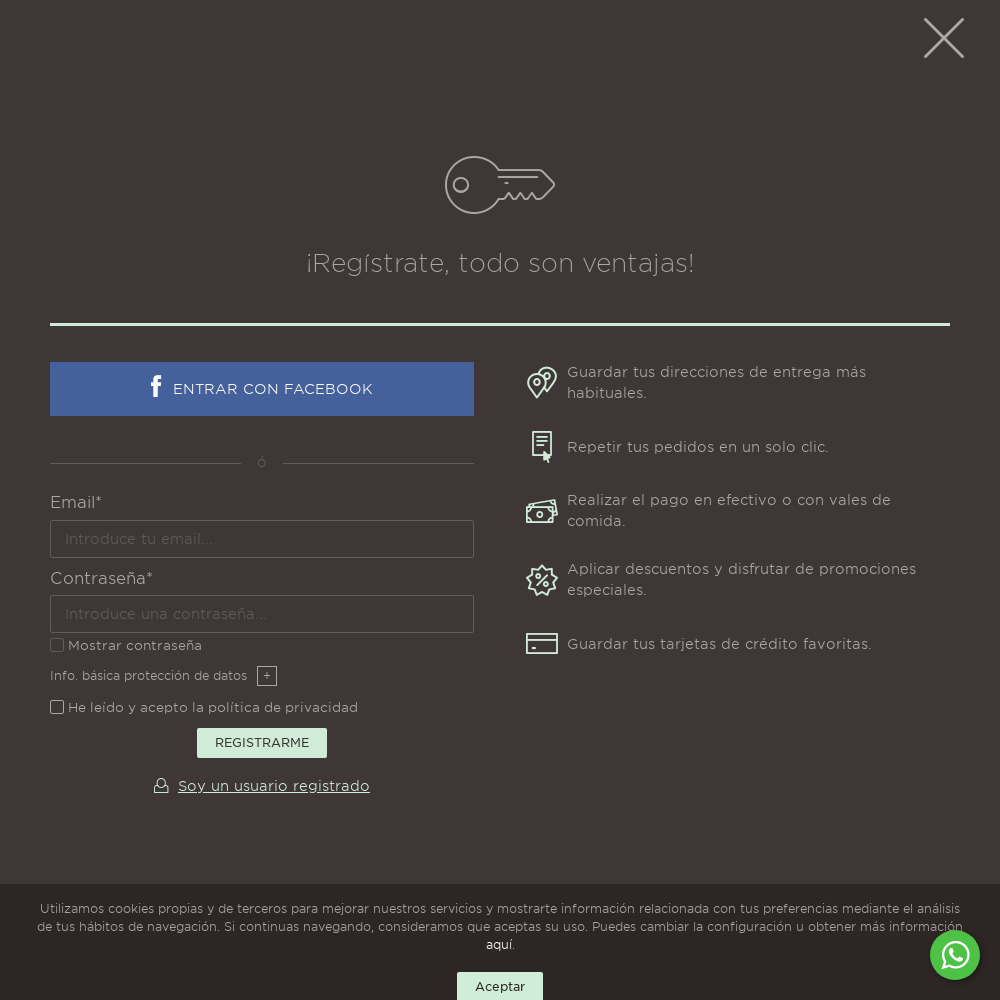

In [ ]:
Image("/content/hito3-registro/fotopagina.png")


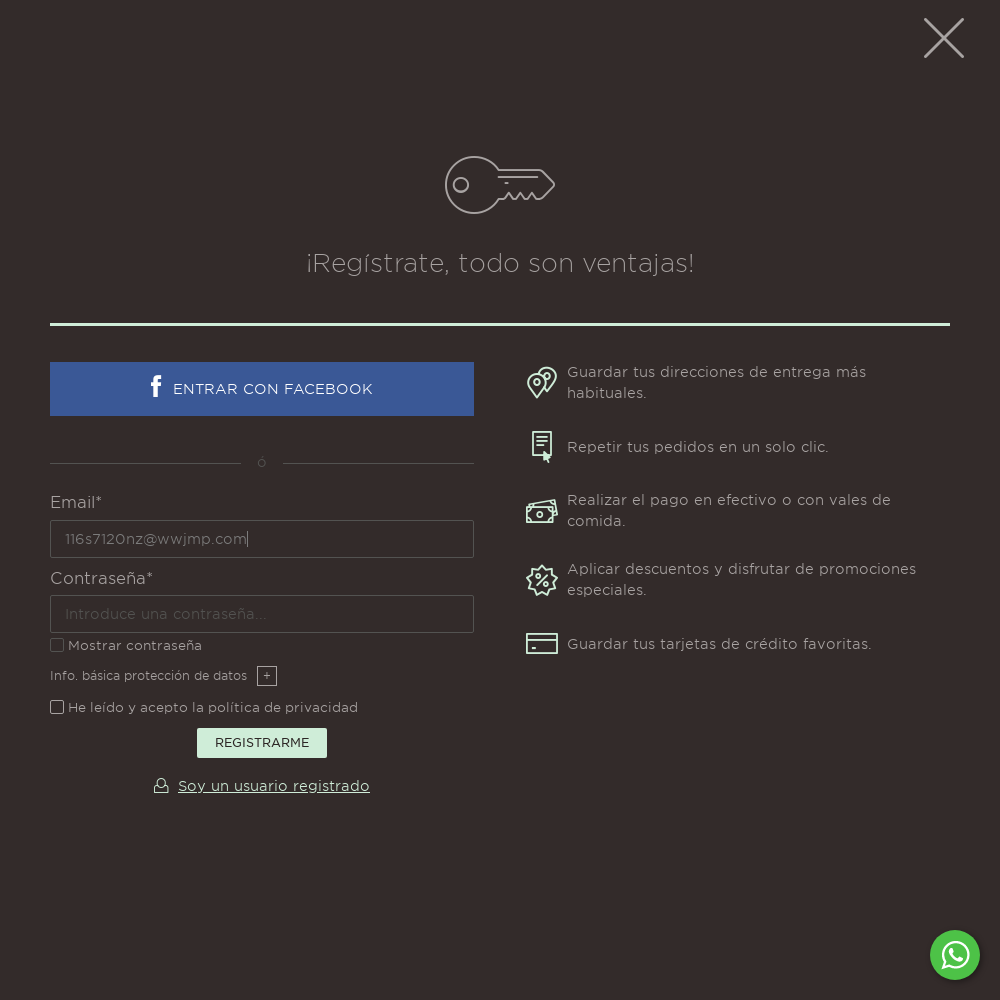

In [ ]:
Image("/content/hito3-registro/emailRegistro.png")


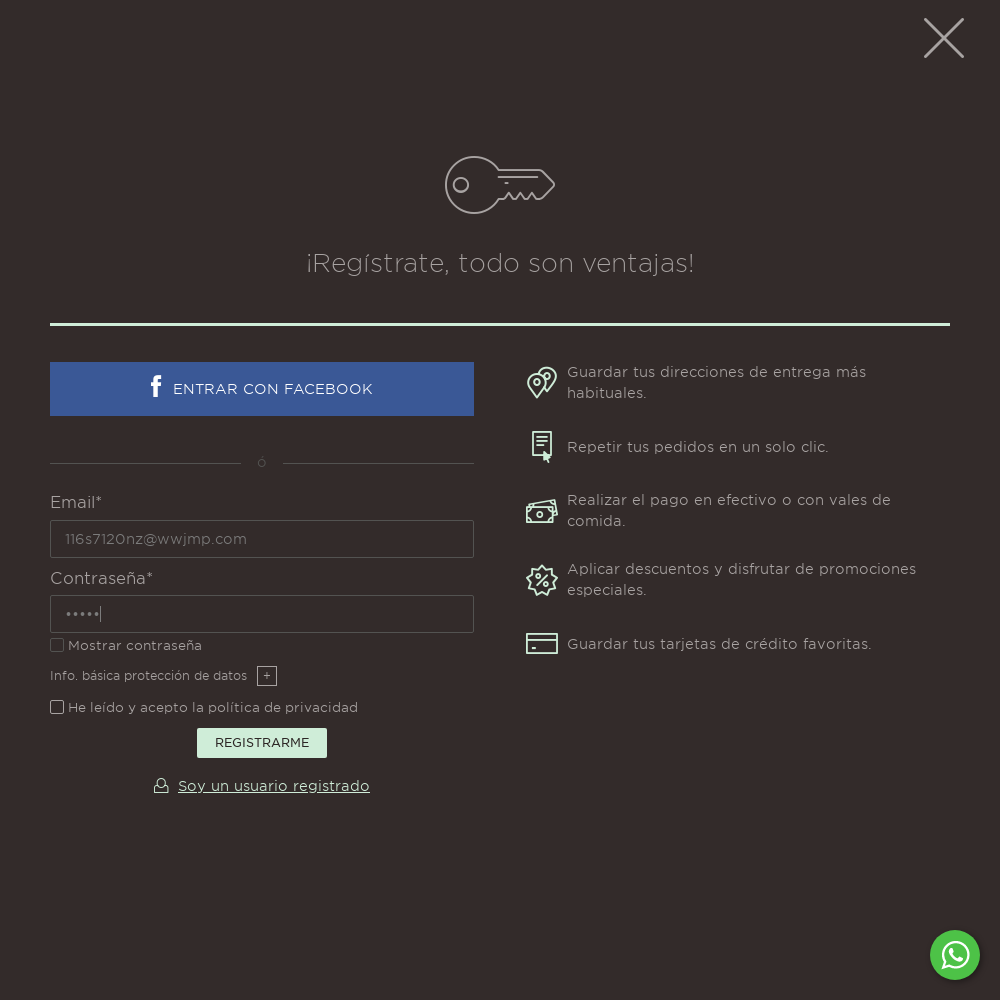

In [ ]:
Image("/content/hito3-registro/passRegistro.png")

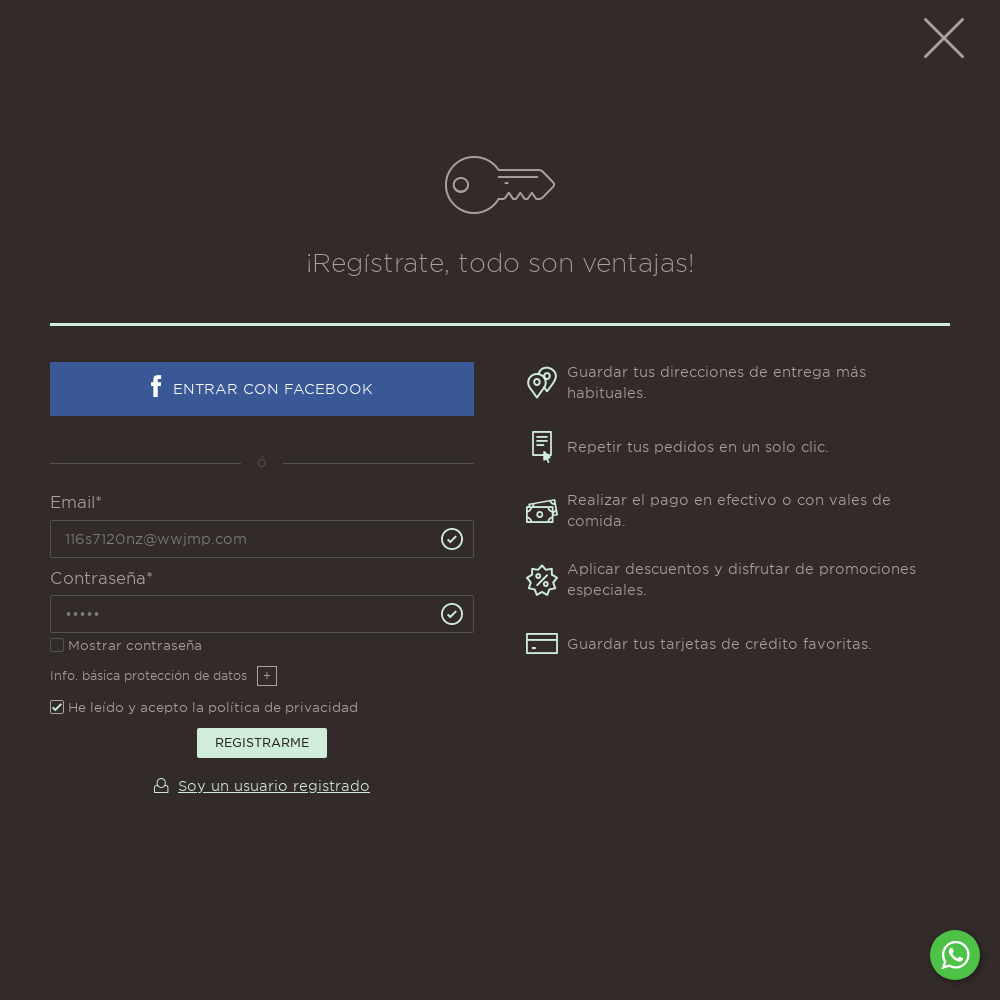

In [ ]:
Image("/content/hito3-registro/teryconRegistro.png")

imagenes registro


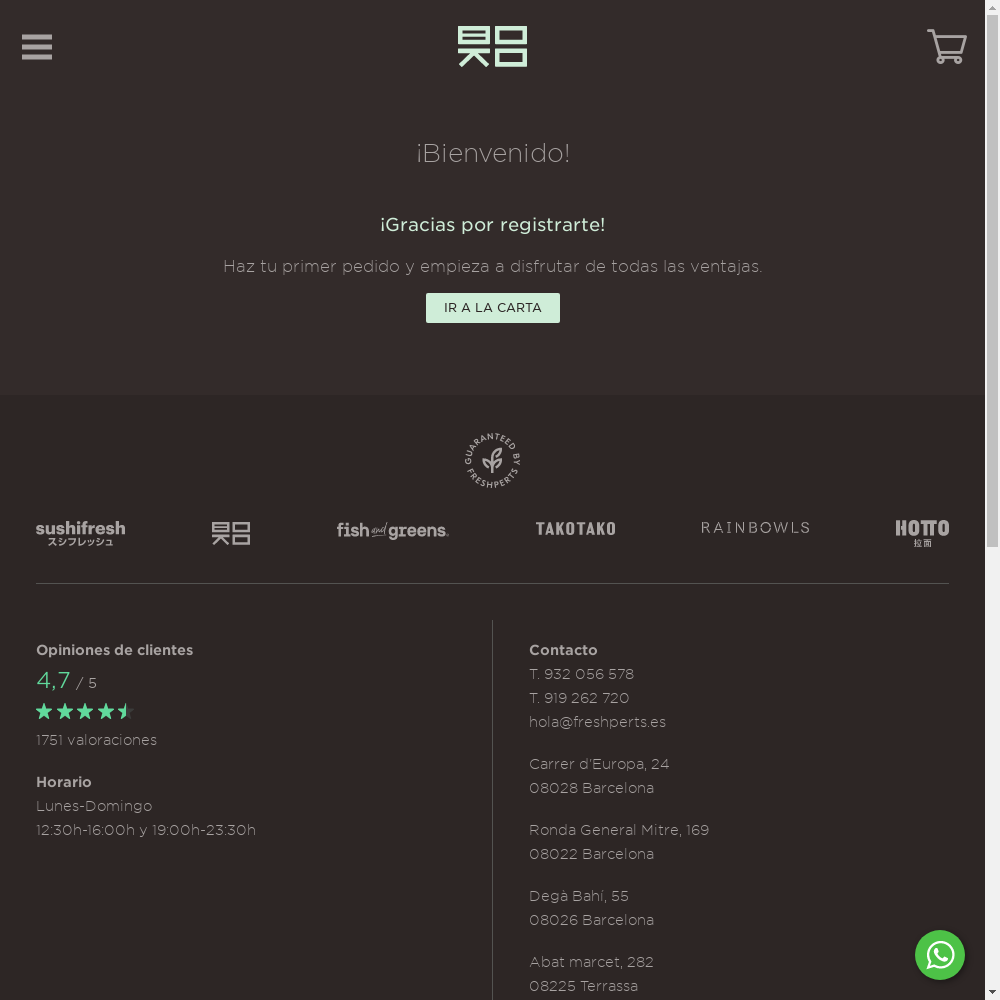

In [ ]:
print("imagenes registro")

Image("/content/hito3-registro/clickRegistro.png")


### Inicio de Sesion

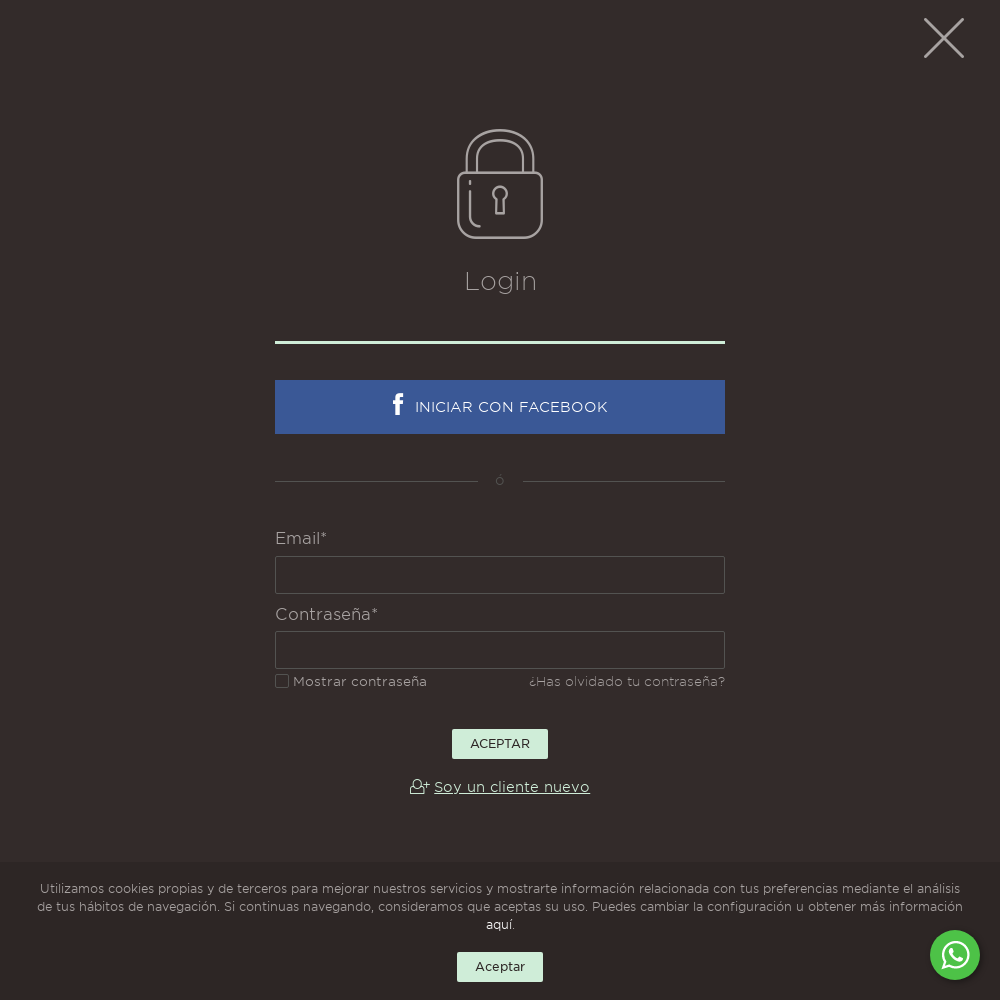

In [ ]:
Image("/content/hito3-inicioSesion/fotopagina.png")

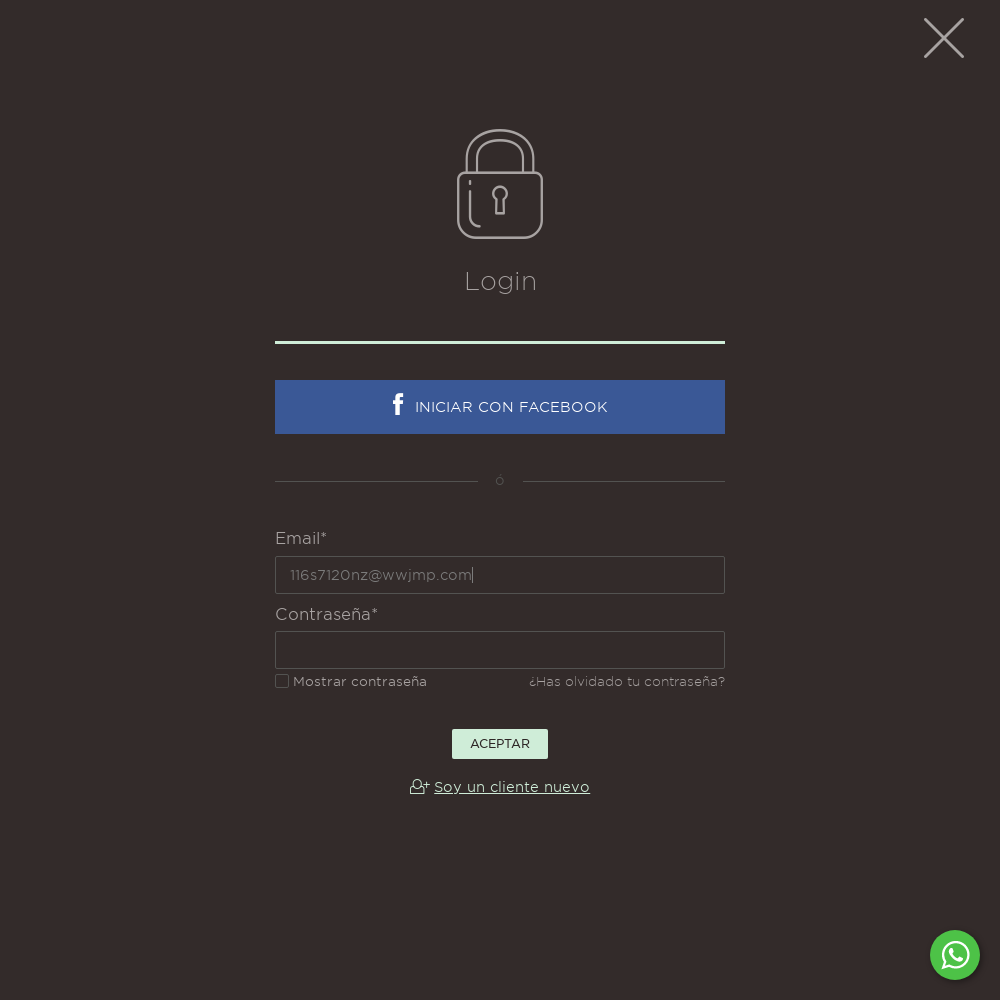

In [ ]:
Image("/content/hito3-inicioSesion/correopagina.png")

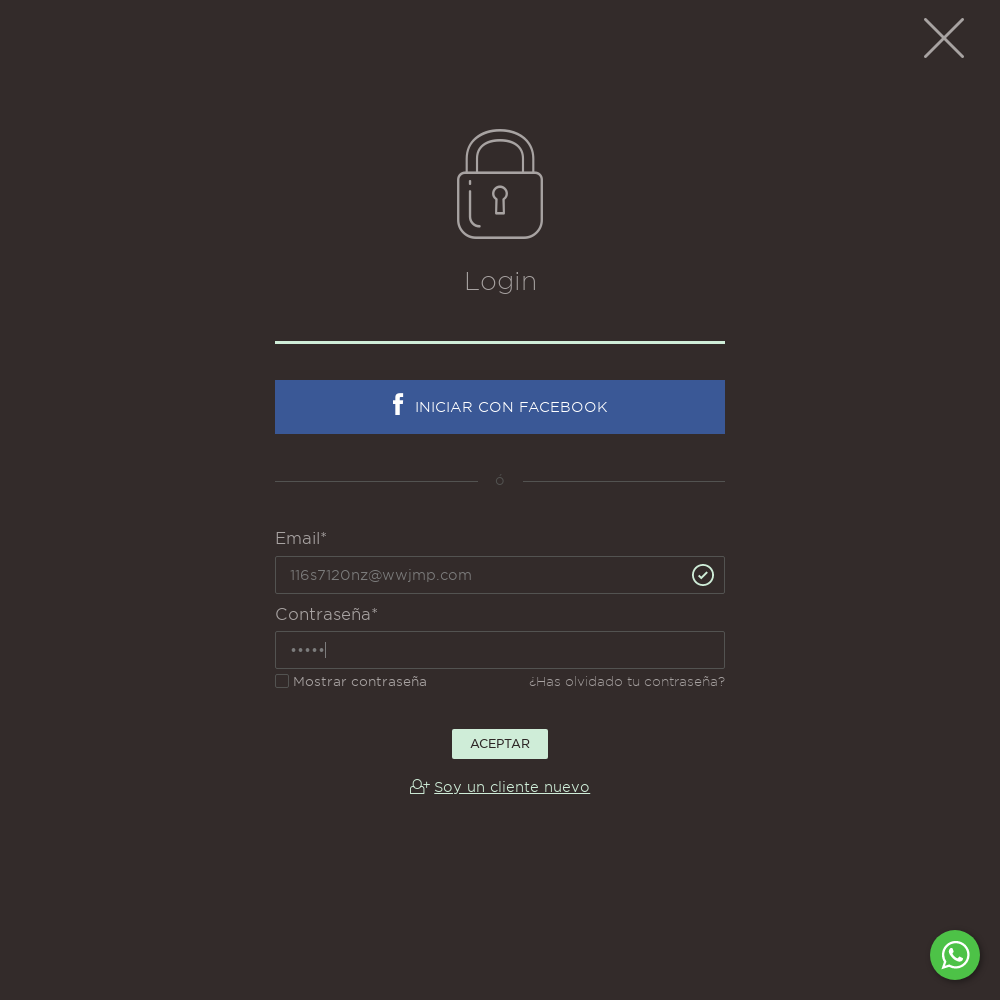

In [ ]:
Image("/content/hito3-inicioSesion/contraseña.png")

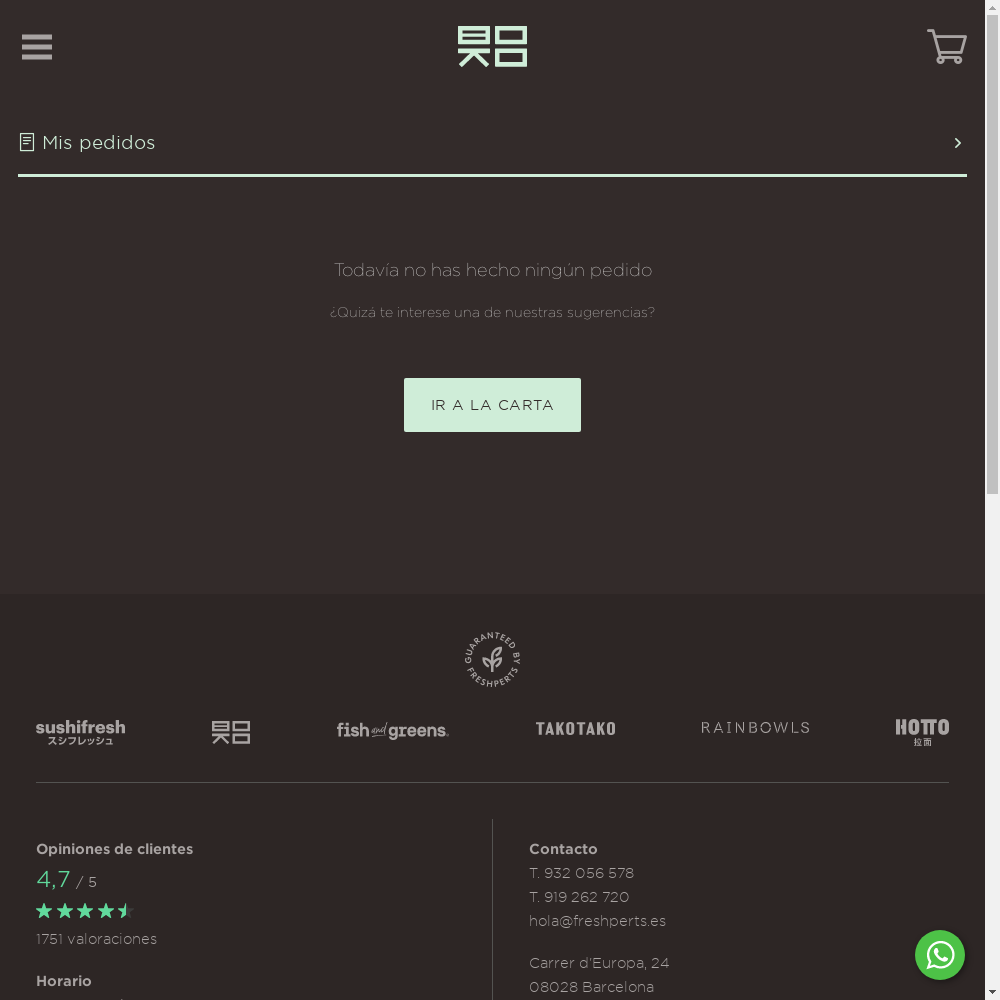

In [ ]:
Image("/content/hito3-inicioSesion/click.png")

### restablecer contraseña

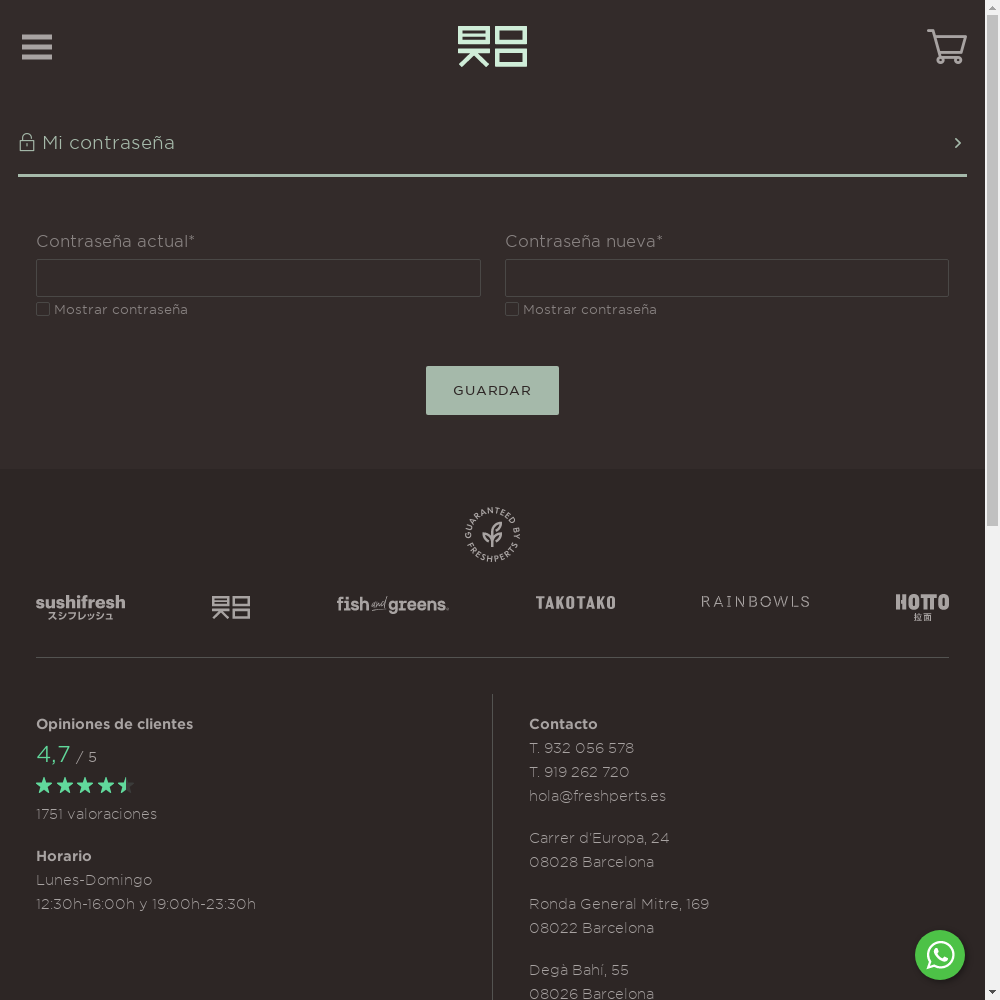

In [ ]:
Image("/content/hito3-restPass/fotopagina.png")

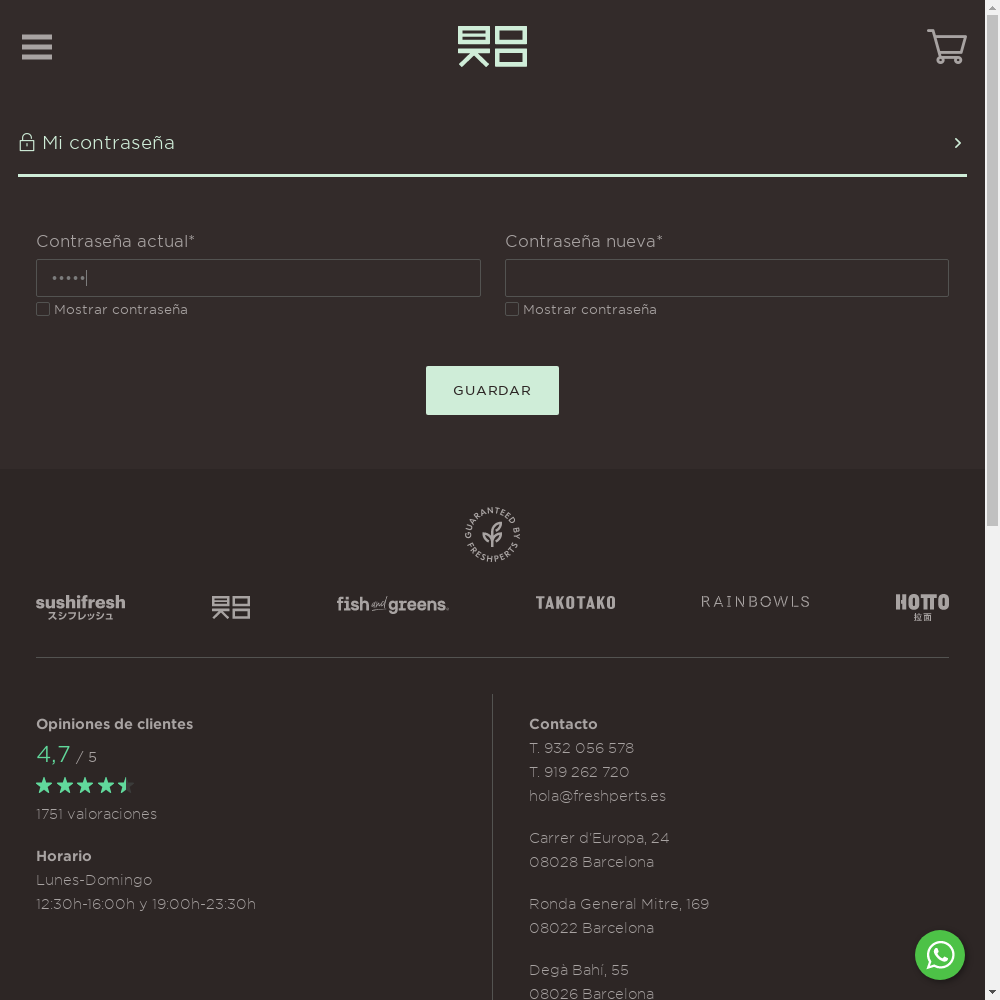

In [ ]:
Image("/content/hito3-restPass/passActual.png")

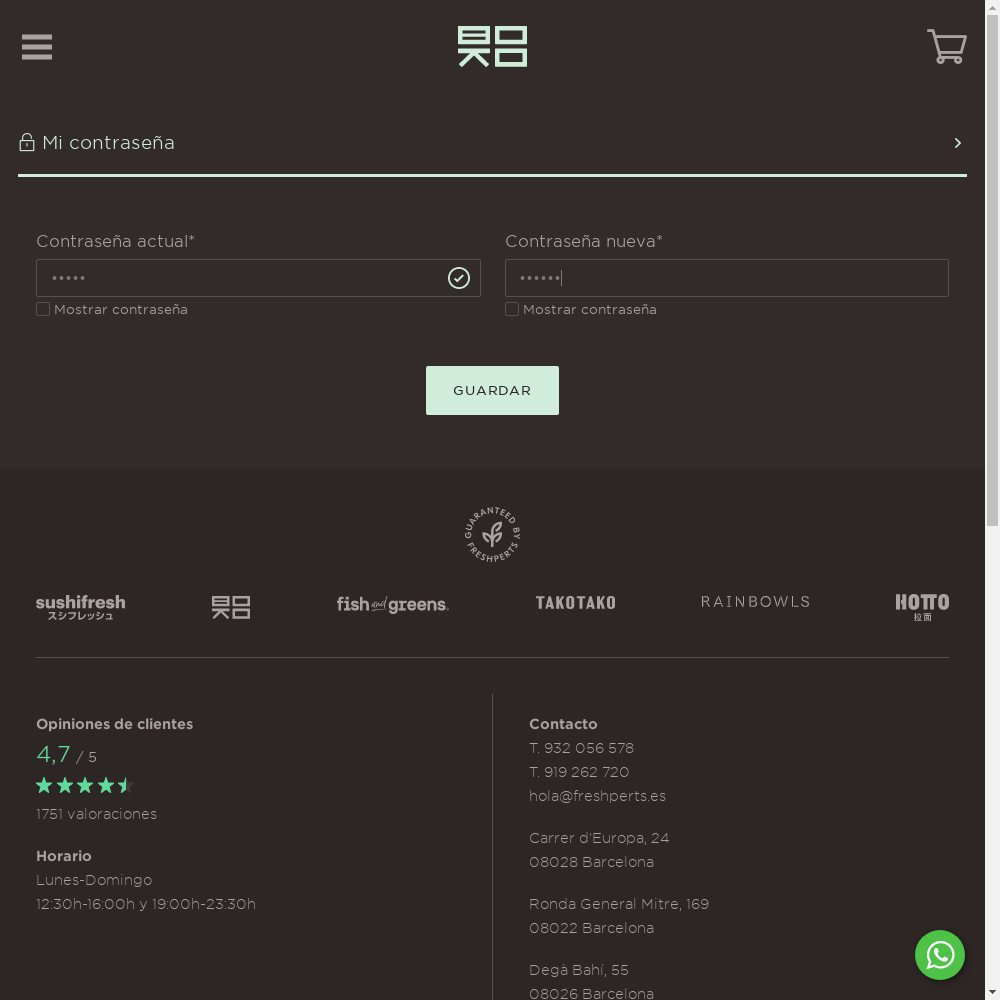

In [ ]:
Image("/content/hito3-restPass/newPass.png")

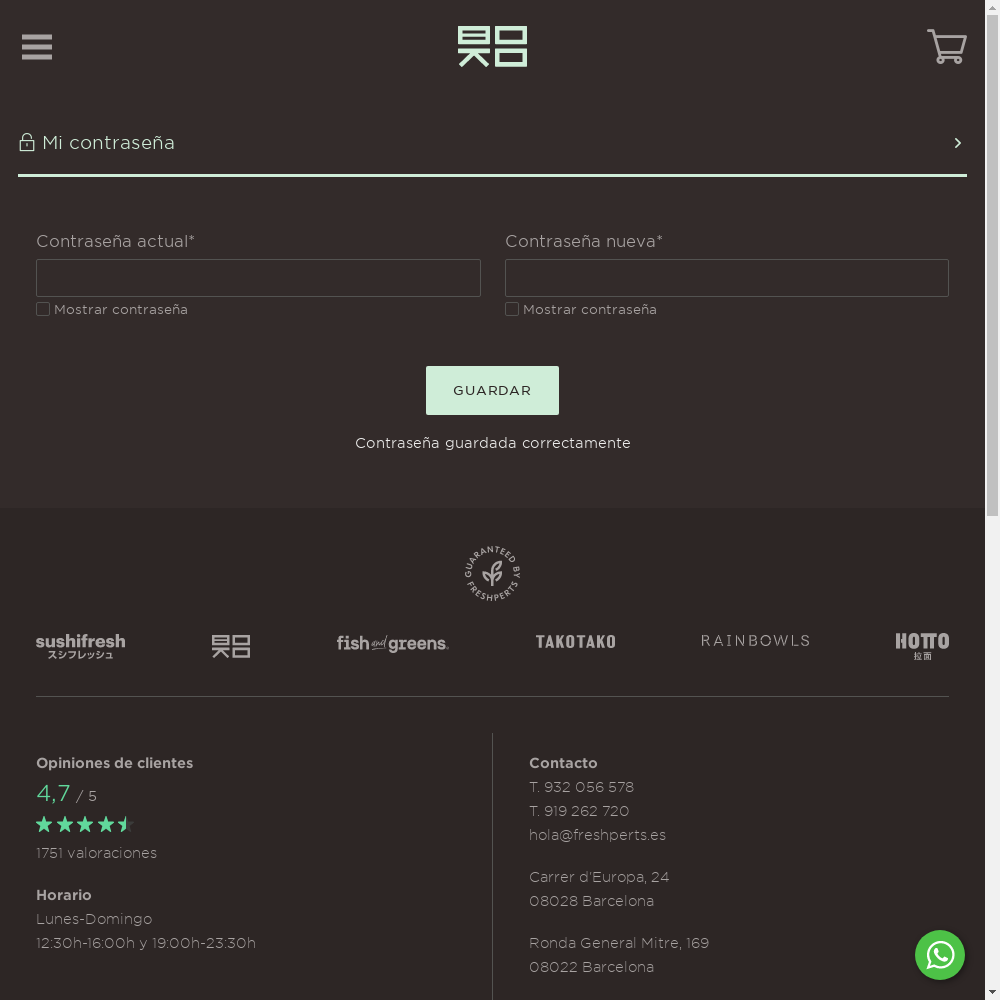

In [ ]:
Image("/content/hito3-restPass/cambioContraseña.png")

### olvide mi contraseña

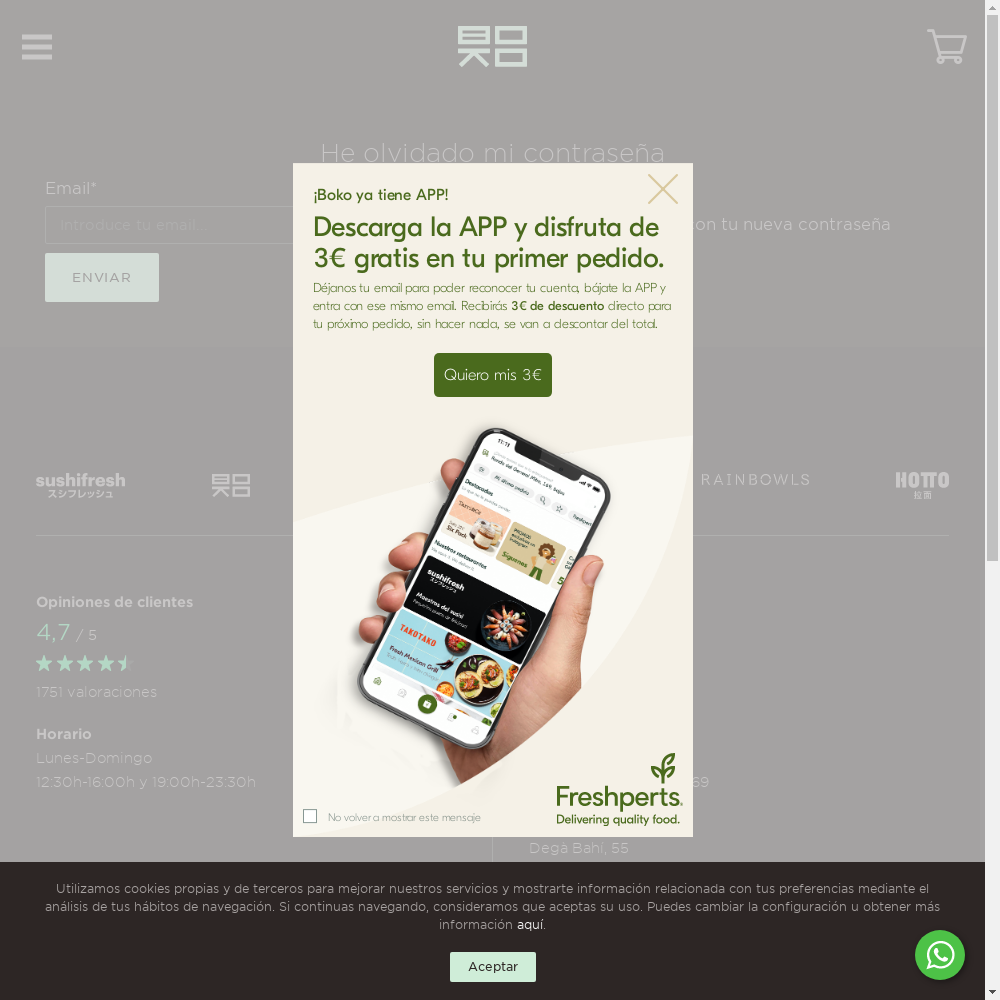

In [ ]:
Image("/content/hito3-olvidoPass/fotopagina.png")

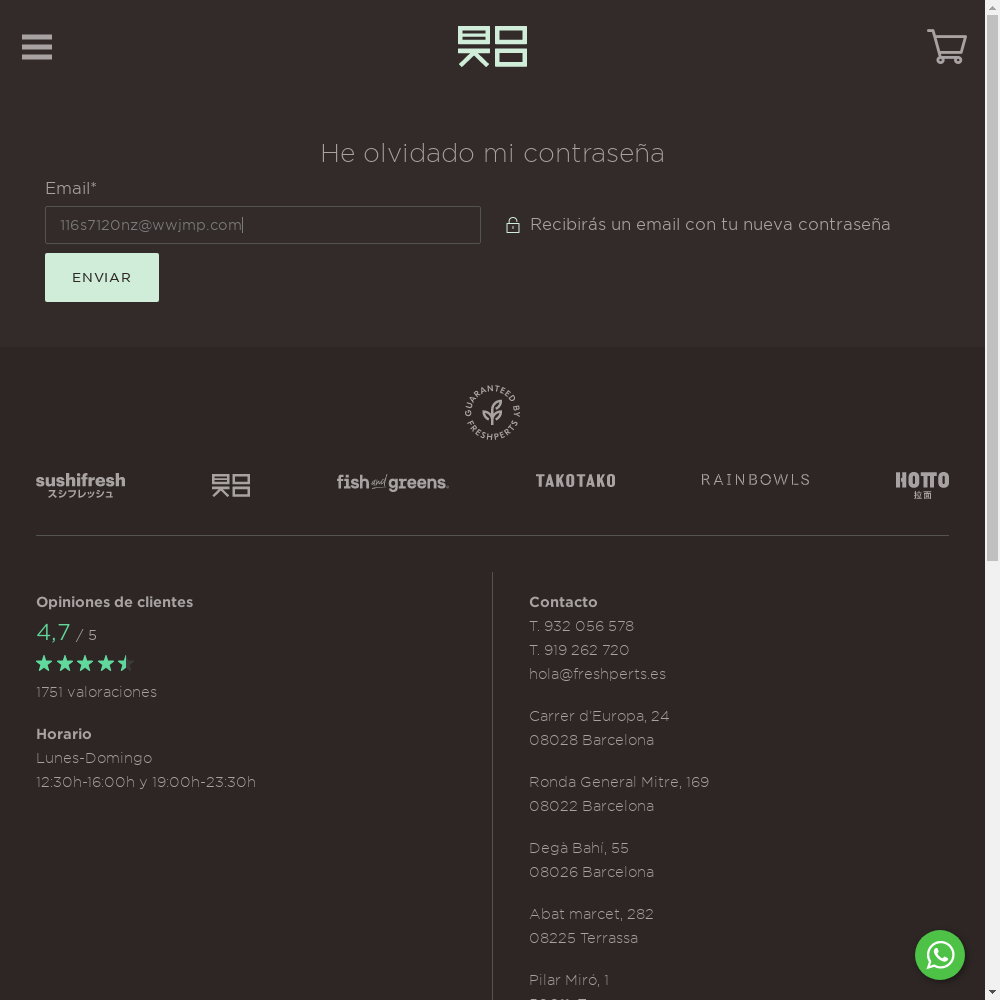

In [ ]:
Image("/content/hito3-olvidoPass/email.png")

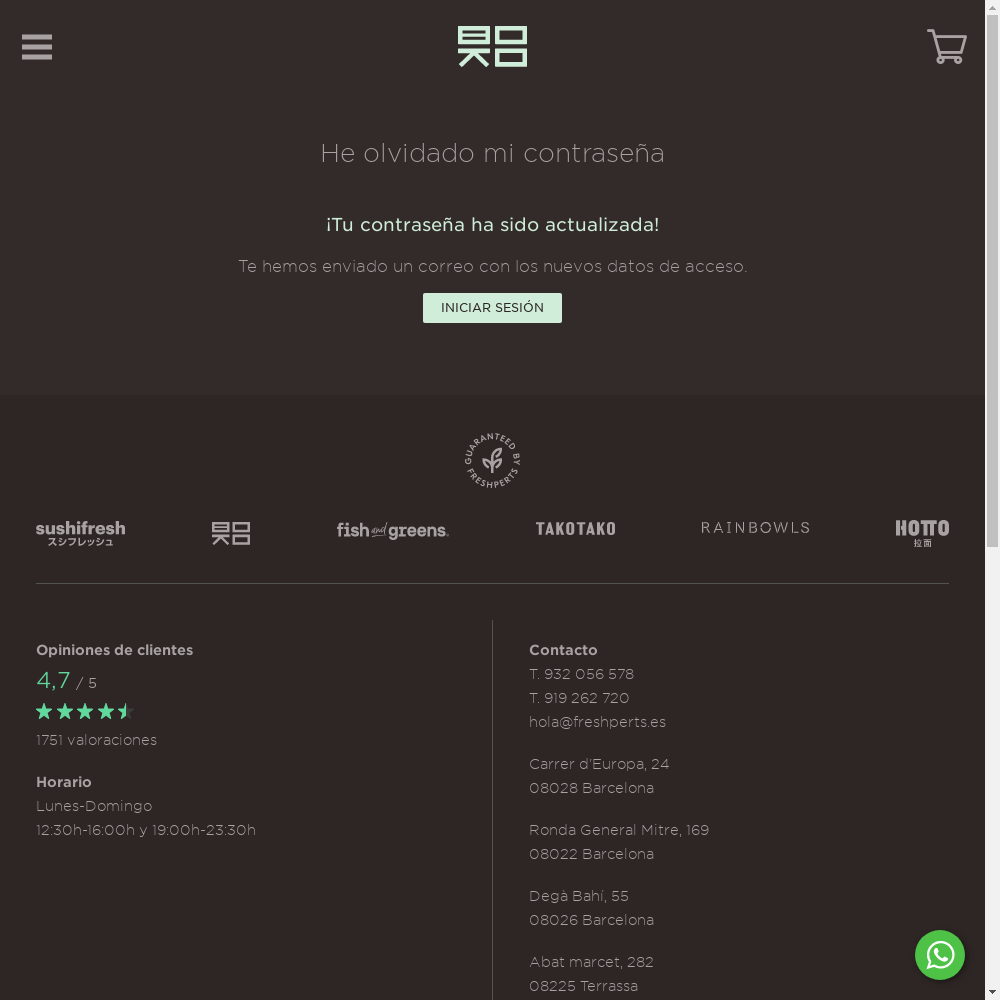

In [ ]:
Image("/content/hito3-olvidoPass/clik.png")

# Pagina Chilena

##Funciones


In [ ]:
!mkdir hito3-CH-registro
!mkdir hito3-CH-inicioSesion
!mkdir hito3-CH-restPass
!mkdir hito3-CH-olvidoPass
!mkdir hito3-CH-cerrarSesion

mkdir: cannot create directory ‘hito3-CH-registro’: File exists
mkdir: cannot create directory ‘hito3-CH-inicioSesion’: File exists
mkdir: cannot create directory ‘hito3-CH-restPass’: File exists
mkdir: cannot create directory ‘hito3-CH-olvidoPass’: File exists
mkdir: cannot create directory ‘hito3-CH-cerrarSesion’: File exists


In [ ]:
import requests
import json

def generateEmail():
    url = "https://www.1secmail.com/api/v1/?action=genRandomMailbox&count=1"
    response = requests.get(url)
    data = json.loads(response.text)
    return data[0]

def readMails(mail):
    user = mail.split('@')[0]
    domain = mail.split('@')[1]
    url = f"https://www.1secmail.com/api/v1/?action=getMessages&login={user}&domain={domain}"
    response = requests.get(url)
    data = json.loads(response.text)
    return data

def readMail(mail,id):
    user = mail.split('@')[0]
    domain = mail.split('@')[1]
    url = f"https://www.1secmail.com/api/v1/?action=readMessage&login={user}&domain={domain}&id={id}"
    response = requests.get(url)
    data = json.loads(response.text)
    return data

## Registro

In [ ]:
from IPython.display import Image
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from time import sleep
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--disable-popup-blocking")
chrome_options.add_argument("--window-size=1000x1000")
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
from selenium.webdriver.common.action_chains import ActionChains


def registrarme2(driver,mail,password,conta):
  #registrarme
  driver.get('https://jasaltec.cl/mi-cuenta/')
  sleep(3)
  #debido a ciberday click en cerrar una cosa x que sale
  driver.find_element_by_xpath("/html/body/div[2]/div/div[1]/div/button").click()
  sleep(3)
  driver.save_screenshot('hito3-CH-registro/paginaRegistro.png')

  #click registro
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/div[2]/div/div[3]/a").click()
  sleep(3)
  driver.save_screenshot('hito3-CH-registro/clickRegistro.png')
  
  #ingresar email o usuario
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/div[2]/div/div[2]/form/p[1]/input").send_keys(mail)
  sleep(3)
  driver.save_screenshot('hito3-CH-registro/emailRegistro.png')    

  #Contraseña
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/div[2]/div/div[2]/form/p[2]/span/input").send_keys(password)
  sleep(3)
  driver.save_screenshot('hito3-CH-registro/passRegistro.png')
  
  
  #Contraseña
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/div[2]/div/div[2]/form/p[3]/button").click()
  sleep(3)
  driver.save_screenshot('hito3-CH-registro/resgistrado.png')

#registrarme2(driver,"qip1nka@1secmail.net","P123.sdrt)22",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


## Resteblacer contraseña

In [ ]:
def restablecerPassInicioSesion2(driver,passActual,newPass):
  driver.get('https://jasaltec.cl/mi-cuenta/edit-account/')
  driver.save_screenshot('hito3-CH-restPass/fotopagina.png')
  sleep(5)

  #nombre
  driver.find_element_by_xpath("//*[@id='account_first_name']").send_keys("pedro")
  sleep(3)
  driver.save_screenshot('hito3-CH-restPass/nombre.png')

  #apellido
  driver.find_element_by_xpath("//*[@id='account_last_name']").send_keys("altamrino")
  sleep(3)
  driver.save_screenshot('hito3-CH-restPass/apellido.png')

  #contraseña Actual
  driver.find_element_by_xpath("//*[@id='password_current']").send_keys(passActual)
  sleep(3)
  driver.save_screenshot('hito3-CH-restPass/passActual.png')

  #nueva contraseña
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/div/div[2]/form/fieldset/p[2]/span/input").send_keys(newPass)
  sleep(3)
  driver.save_screenshot('hito3-CH-restPass/newPass.png')
  
  #nueva contraseña X2
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/div/div[2]/form/fieldset/p[3]/span/input").send_keys(newPass)
  sleep(3)
  driver.save_screenshot('hito3-CH-restPass/newPass2.png')

  #click para el cambio
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/div/div[2]/form/p[5]/button").click()
  sleep(3)
  driver.save_screenshot('hito3-CH-restPass/cambioContraseña.png')
#restablecerPassInicioSesion(driver,"P123.sdrt)22","P123.sdrt)23")

## Inicio de Sesion

In [ ]:
def inicioSesion2(driver,mail,password,conta):
  #inicio de sesion
  #Entrar pagina española
  driver.get('https://jasaltec.cl/mi-cuenta/')
  driver.save_screenshot('hito3-inicioSesion/fotopagina.png')

  sleep(3)
  #debido a ciberday click en cerrar una cosa x que sale
  driver.find_element_by_xpath("/html/body/div[2]/div/div[1]/div/button").click()
  sleep(3)
  driver.save_screenshot('hito3-CH-registro/paginaRegistro.png')

  #correo
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/div[2]/div/div[1]/form/p[1]/input").send_keys(mail)
  sleep(5)
  driver.save_screenshot('hito3-CH-inicioSesion/correopagina.png')

  #contraseña
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/div[2]/div/div[1]/form/p[2]/span/input").send_keys(password)
  sleep(5)
  driver.save_screenshot('hito3-CH-inicioSesion/contraseña.png')

  #click
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/div[2]/div/div[1]/form/p[3]/button").click()
  sleep(5)
  driver.save_screenshot('hito3-CH-inicioSesion/click.png')
#driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
#inicioSesion2(driver,"lalival492@lockaya.com","P123.sdrt)23","1")

## olvido contraseña

In [ ]:
from bs4 import BeautifulSoup

def link(email):
  data=readMails(email)
  id=data[0]['id']
  data2=readMail(email,id)
  mensaje=data2['body']
  bs = BeautifulSoup(mensaje, 'html.parser')
  conta = 0
  for href in bs.find_all('a',href=True):
    if (conta==0):
      link = href.get('href')
    conta=conta+1
  return link
def olvideMiPass2(driver,mail,newPass):
  driver.get('https://jasaltec.cl/mi-cuenta/lost-password/')
  sleep (3)
  driver.find_element_by_xpath("/html/body/div[2]/div/div[1]/div/button").click()
  sleep(3)

  driver.save_screenshot('hito3-CH-olvidoPass/pagina.png')

  driver.save_screenshot('hito3-CH-olvidoPass/fotopagina.png')
  #email
  driver.find_element_by_xpath("//*[@id='user_login']").send_keys(mail)
  sleep(5)
  driver.save_screenshot('hito3-CH-olvidoPass/email.png')
  #click
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/form/p[3]/button").click()
  sleep(10)
  driver.save_screenshot('hito3-CH-olvidoPass/clik.png')
  #link enviado 
  url = link(mail)
  
  driver.get(url)
  driver.save_screenshot('hito3-CH-olvidoPass/fotopagina2.png')
  sleep(10)
  #contraseña nueva
  driver.find_element_by_xpath("//*[@id='password_1']").send_keys(newPass)
  sleep(5)
  driver.save_screenshot('hito3-CH-olvidoPass/contraseña1.png')

  #contraseña nueva2
  driver.find_element_by_xpath("//*[@id='password_2']").send_keys(newPass)
  sleep(5)
  driver.save_screenshot('hito3-CH-olvidoPass/contraseña2.png')
  #click
  driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div/div/article/div/div/form/p[4]/button").click()
  sleep(5)
  driver.save_screenshot('hito3-CH-olvidoPass/click2.png')

#correo = generateEmail()
#print(correo)
#correo="qip1nka@1secmail.net"
#print(correo)
#olvideMiPass(driver,correo)



## Codigo de ejecucion Main

In [ ]:
from IPython.display import Image
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from time import sleep
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--disable-popup-blocking")
chrome_options.add_argument("--window-size=1000x1000")
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
from selenium.webdriver.common.action_chains import ActionChains

correo=generateEmail()
print(correo)
contraseña="P123.sdrt)23"
newContraseña="P123.sdrt)24"
#registrarme
registrarme2(driver,correo,contraseña,0)

#resta
restablecerPassInicioSesion2(driver,contraseña,newContraseña)

#cierraSesion
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

#inicioSesion con nueva contraseña
inicioSesion2(driver,correo,newContraseña,0)

#cierra sesion
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

#olvide mi contraseña
#correo="doqzeh@wwjmp.com"
olvideMiPass2(driver,correo,contraseña)

#inicio de sesion
#inicioSesion2(driver,correo,contraseña,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


qudbqswk@bheps.com


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: find_element_by_

## Imagenes

### Registro

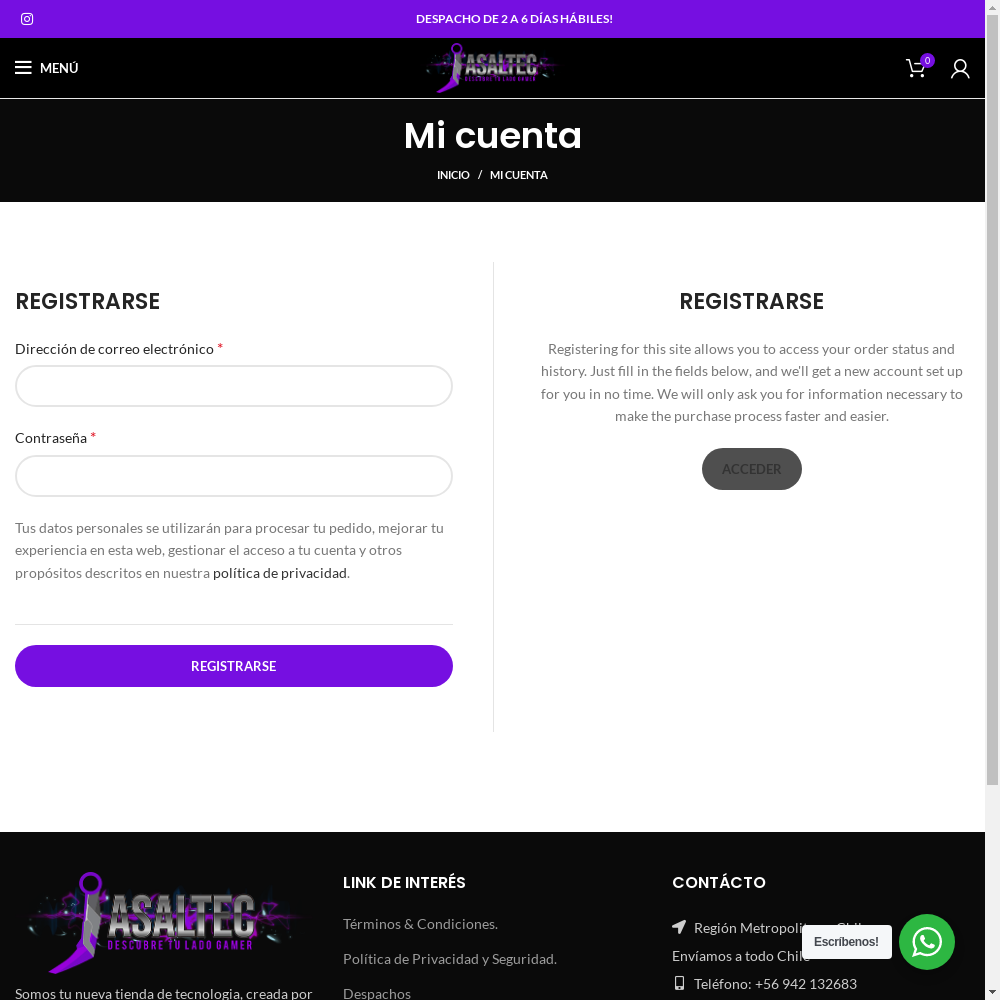

In [ ]:
Image("/content/hito3-CH-registro/clickRegistro.png")

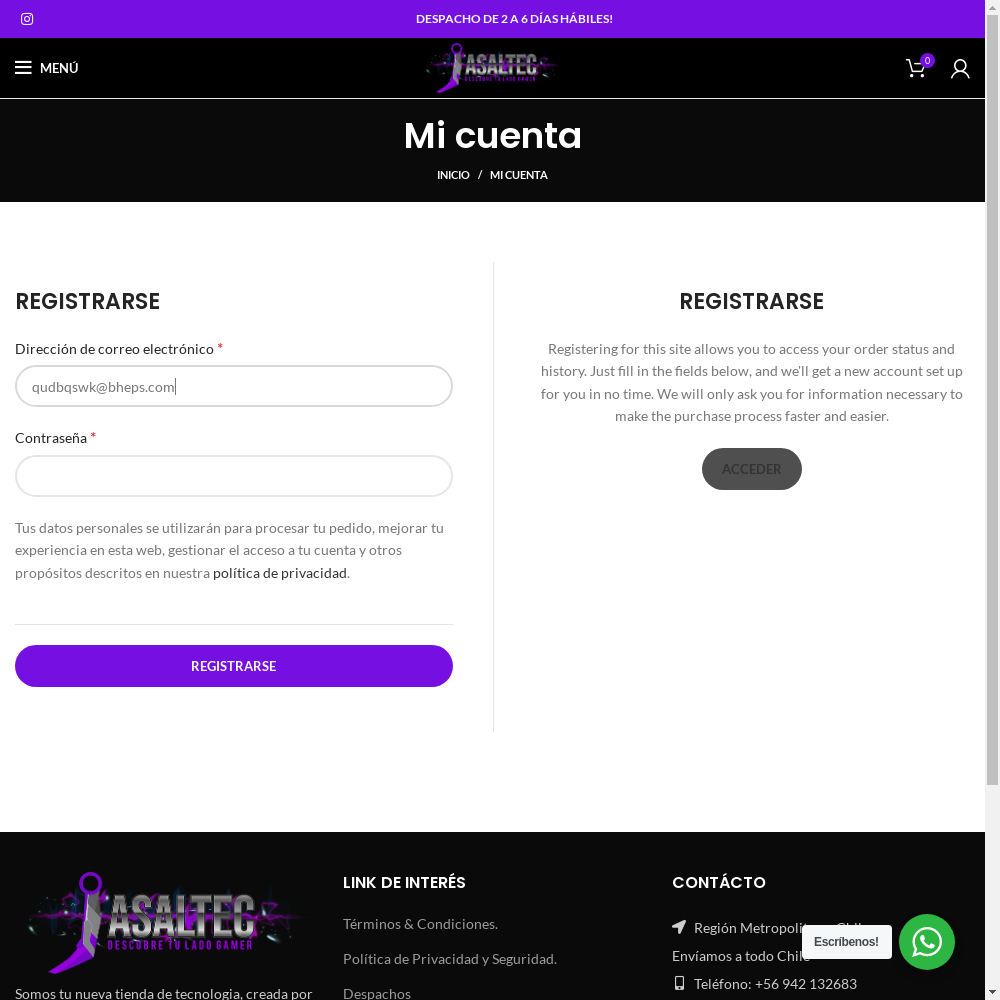

In [ ]:
Image("/content/hito3-CH-registro/emailRegistro.png")

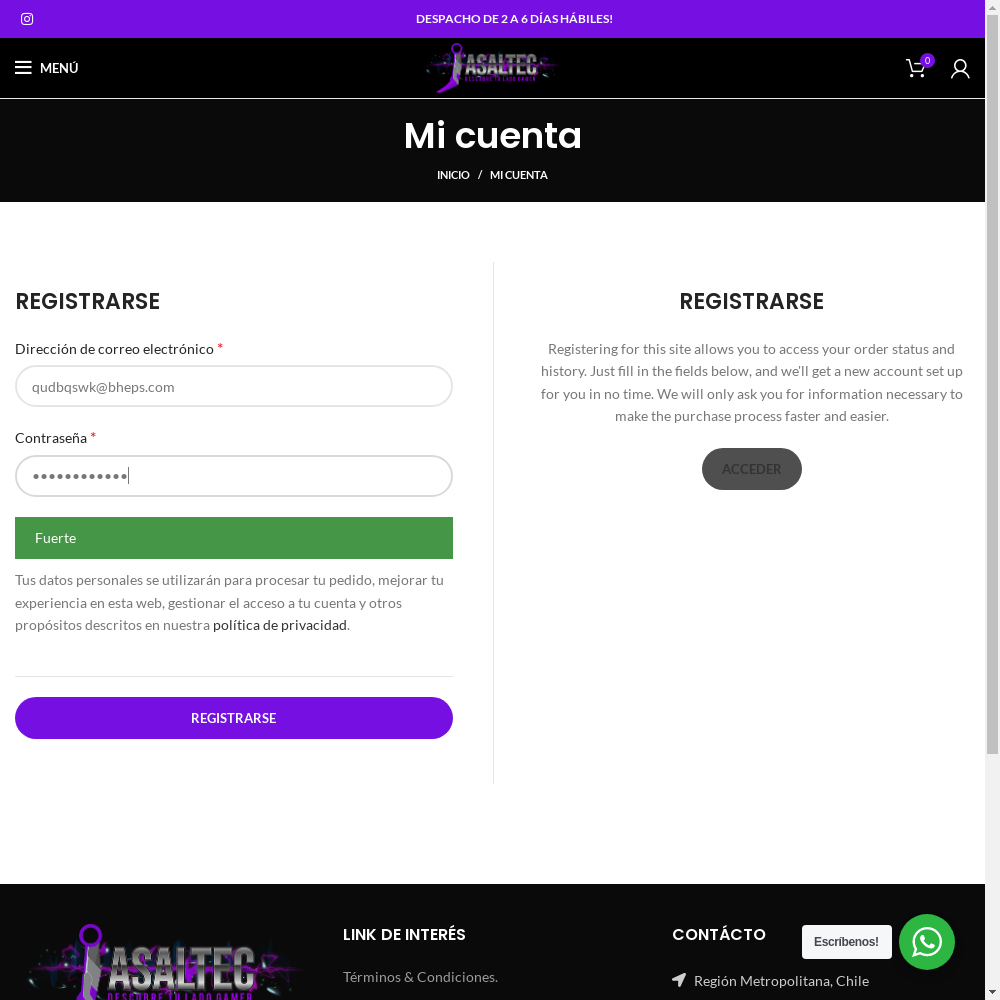

In [ ]:
Image("/content/hito3-CH-registro/passRegistro.png")

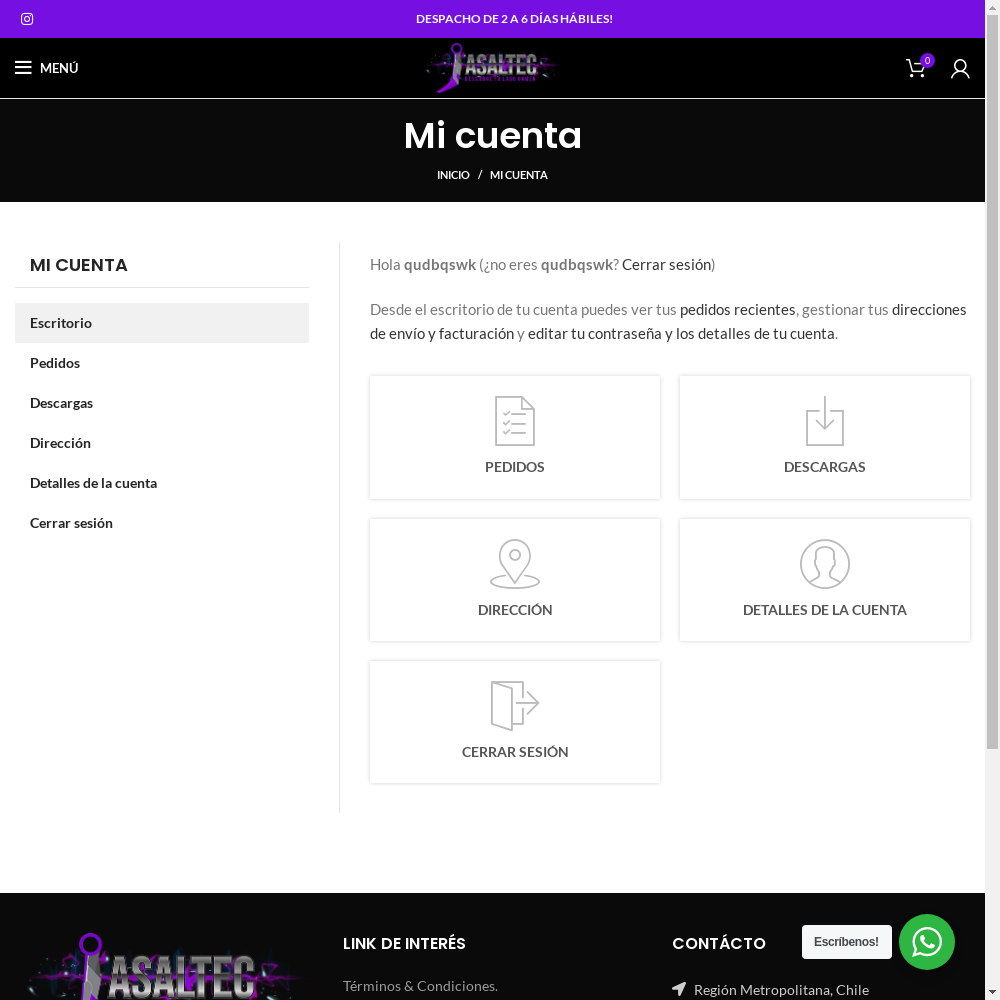

In [ ]:
Image("/content/hito3-CH-registro/resgistrado.png")

### restablerce contraseña

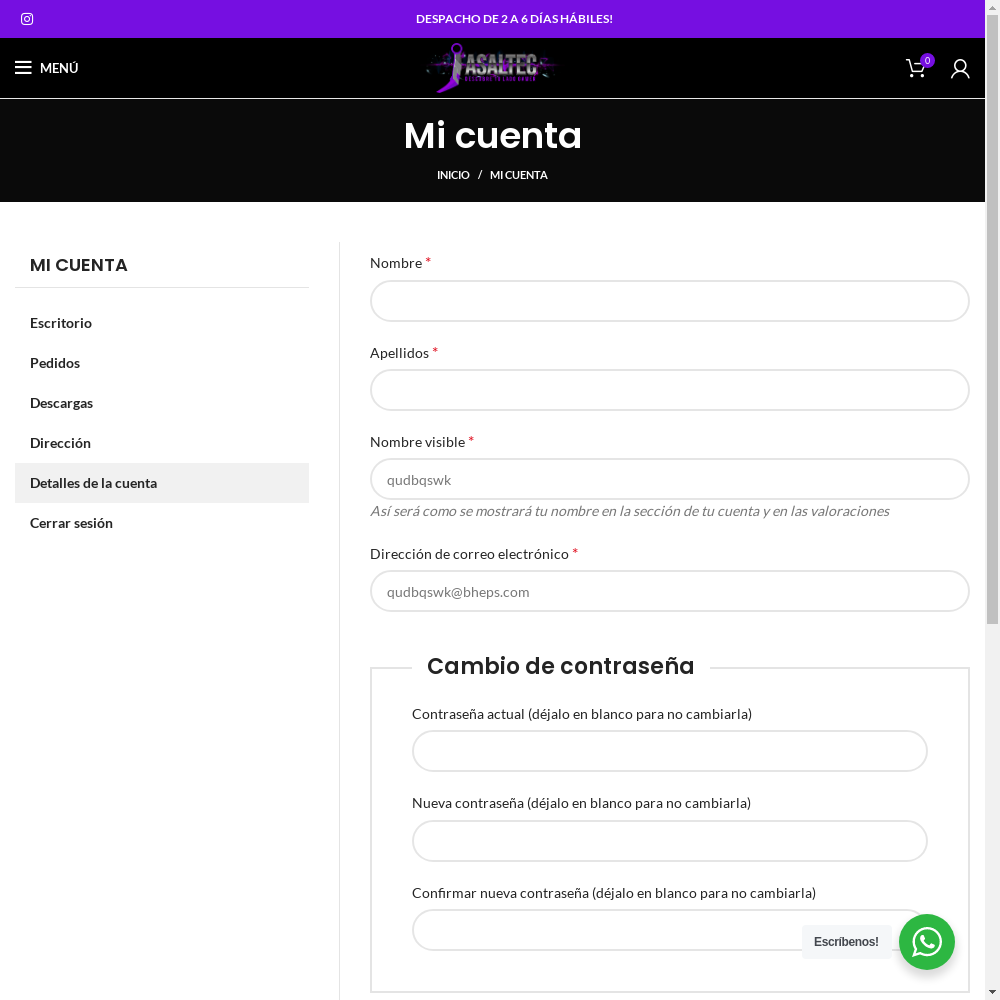

In [ ]:
Image("/content/hito3-CH-restPass/fotopagina.png")

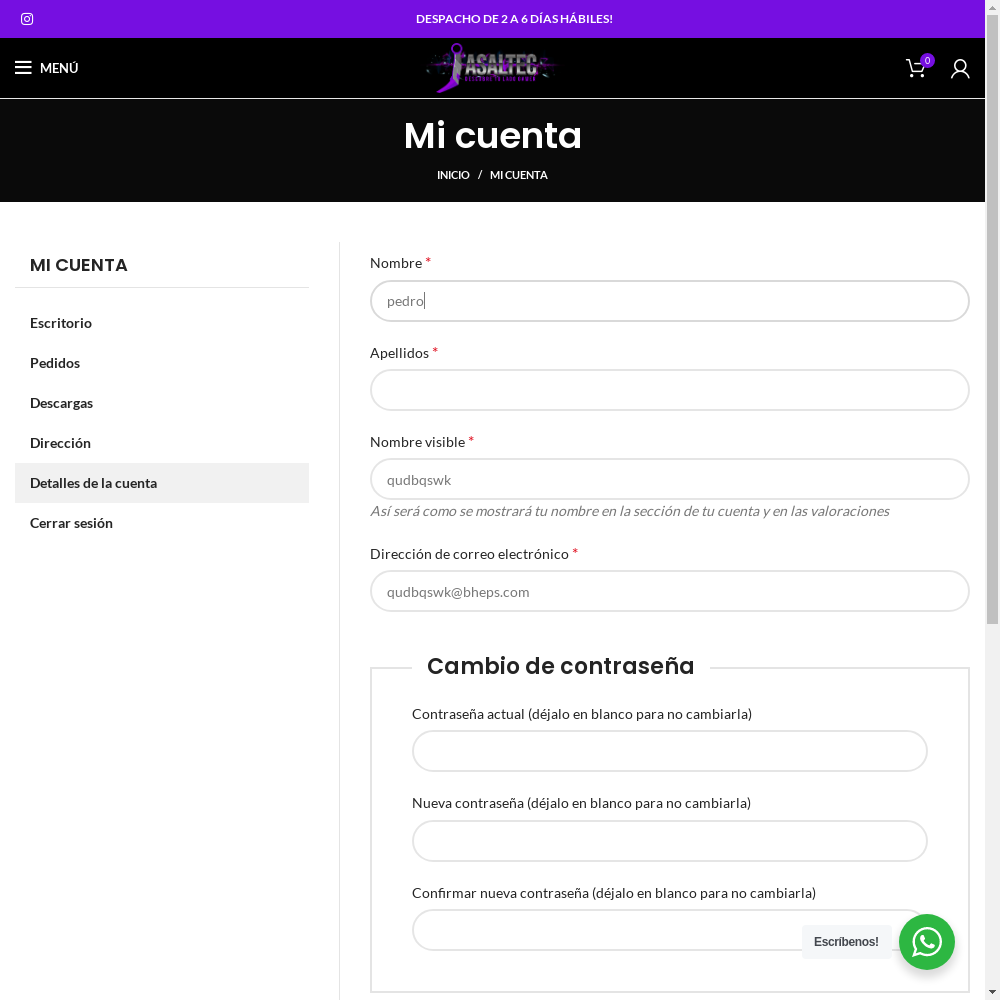

In [ ]:
Image("/content/hito3-CH-restPass/nombre.png")

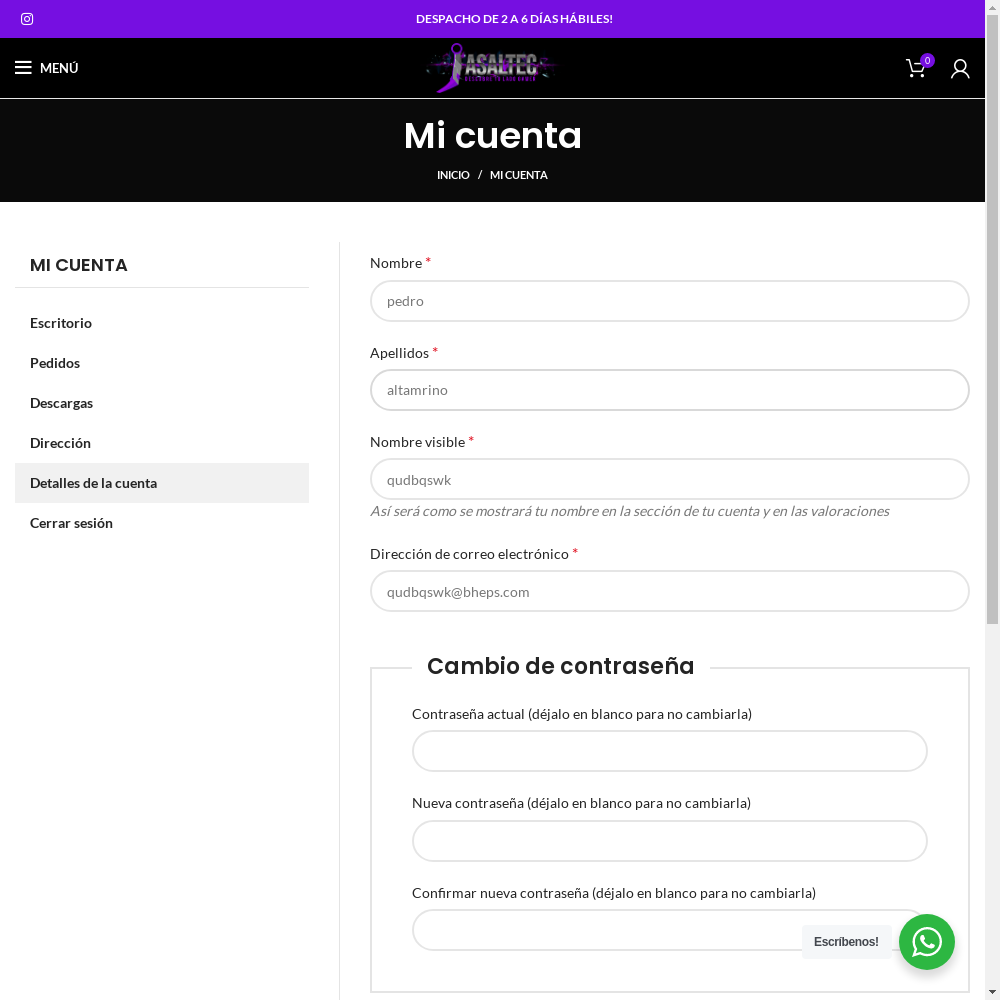

In [ ]:
Image("/content/hito3-CH-restPass/apellido.png")

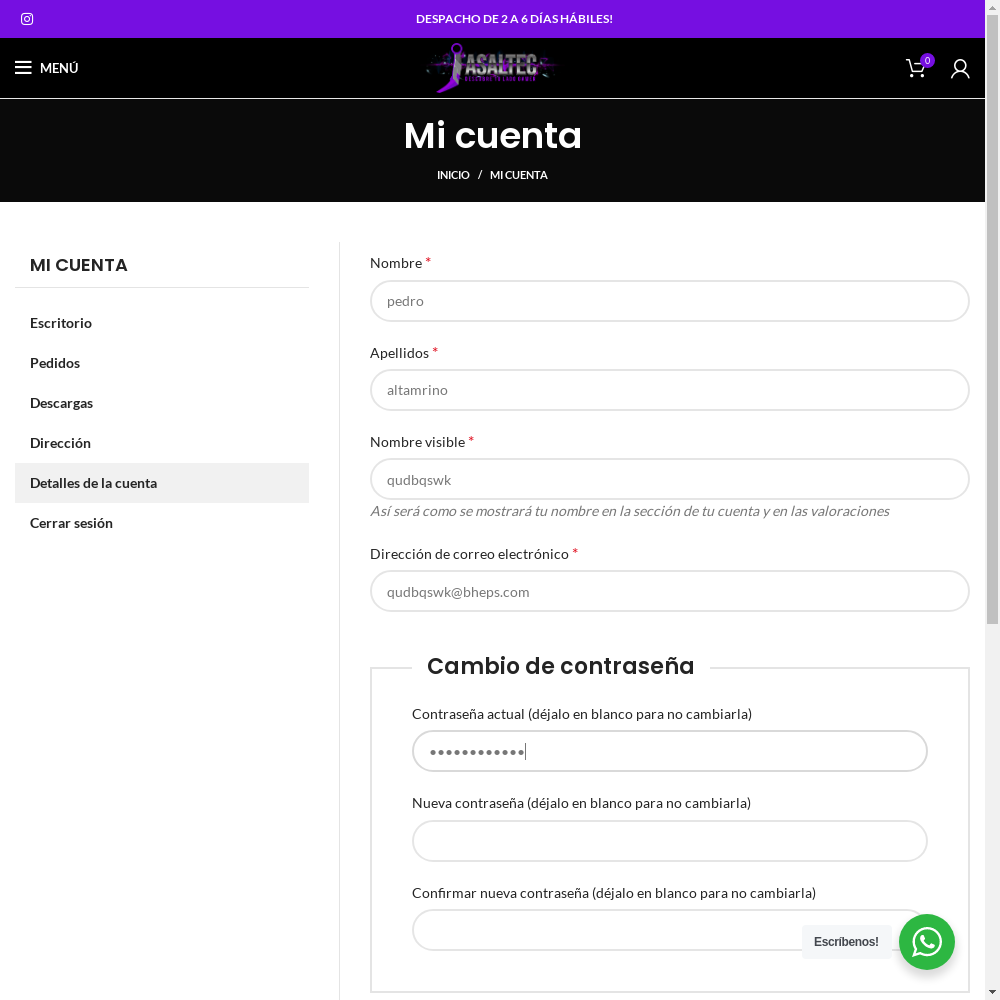

In [ ]:
Image("/content/hito3-CH-restPass/passActual.png")

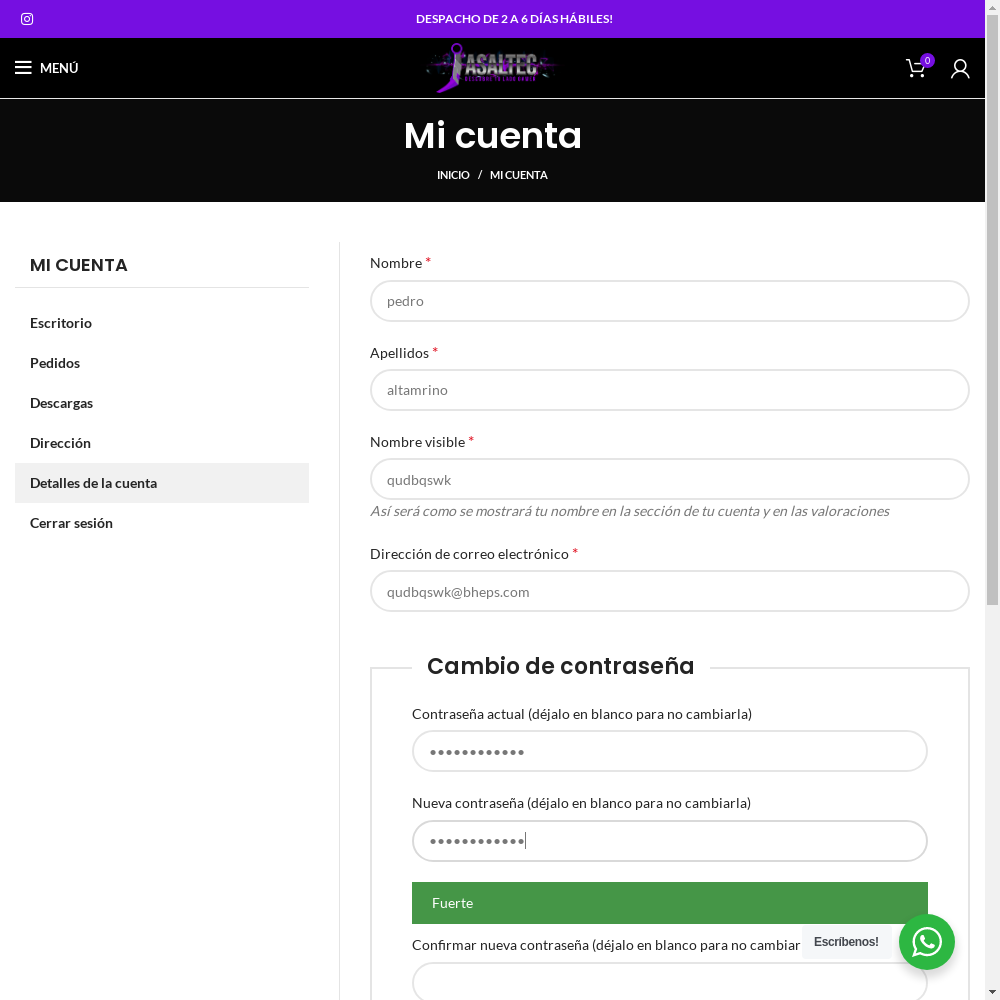

In [ ]:
Image("/content/hito3-CH-restPass/newPass.png")

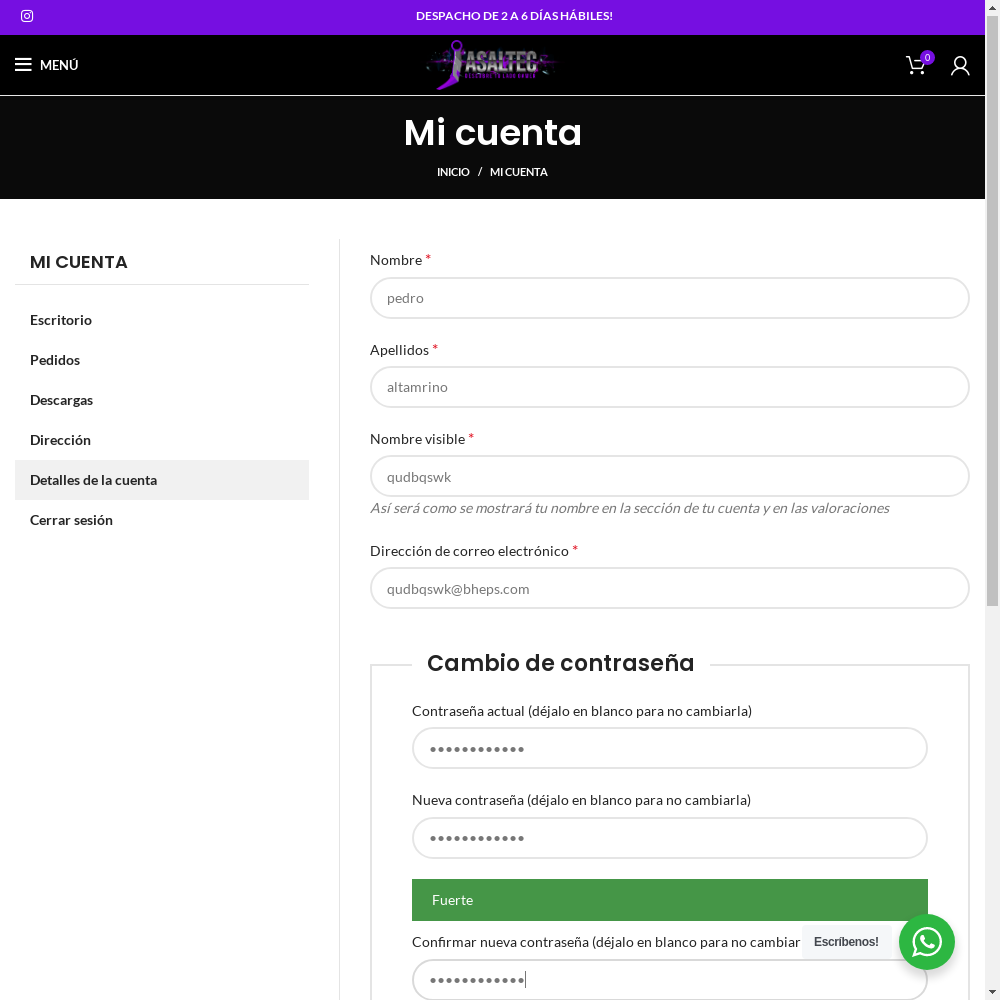

In [ ]:
Image("/content/hito3-CH-restPass/newPass2.png")

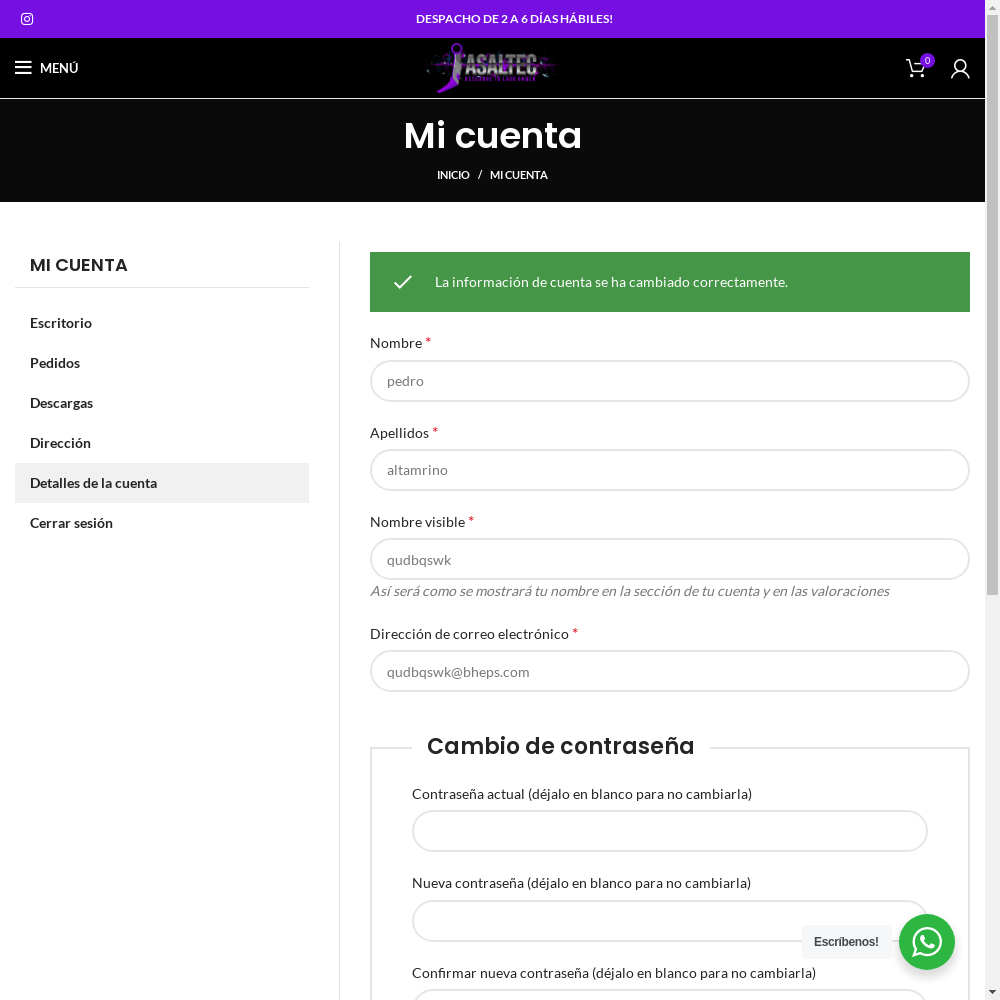

In [ ]:
Image("/content/hito3-CH-restPass/cambioContraseña.png")

### Inicio de Sesion


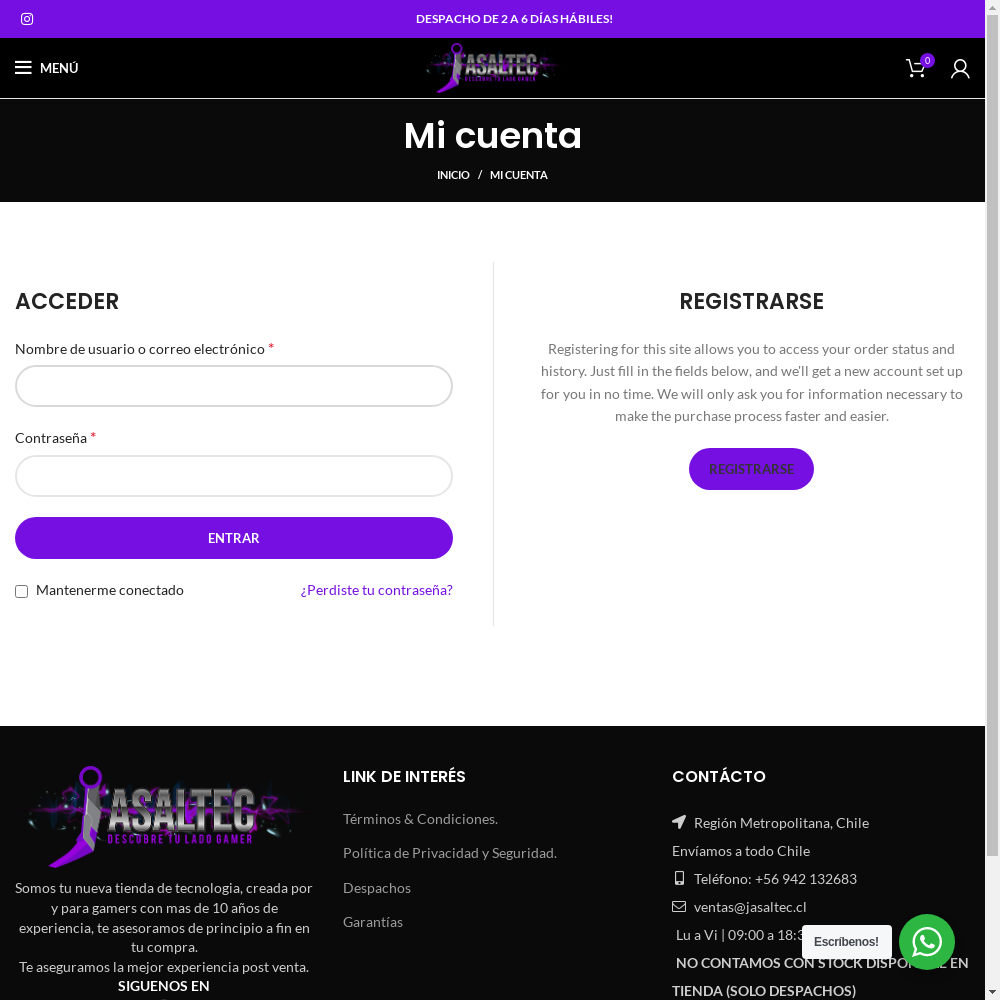

In [ ]:
Image("/content/hito3-CH-inicioSesion/correopagina.png")

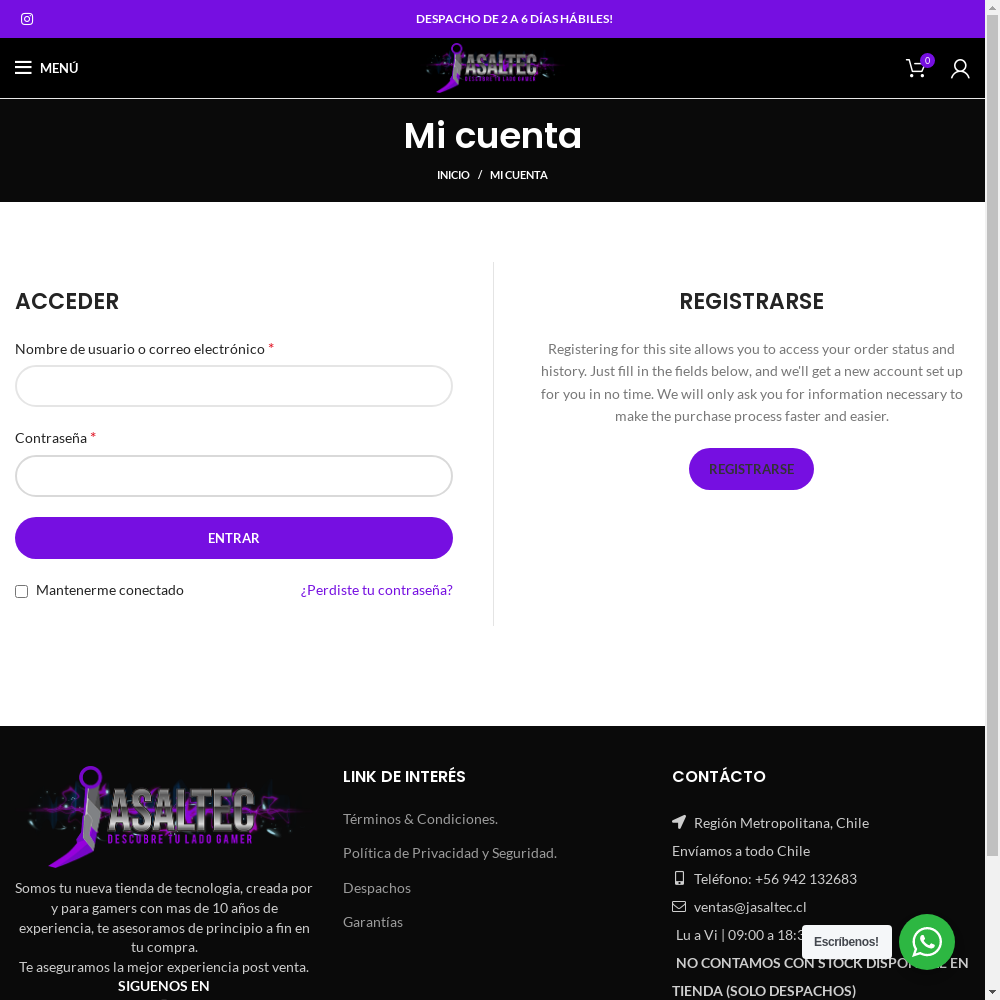

In [ ]:
Image("/content/hito3-CH-inicioSesion/contraseña.png")

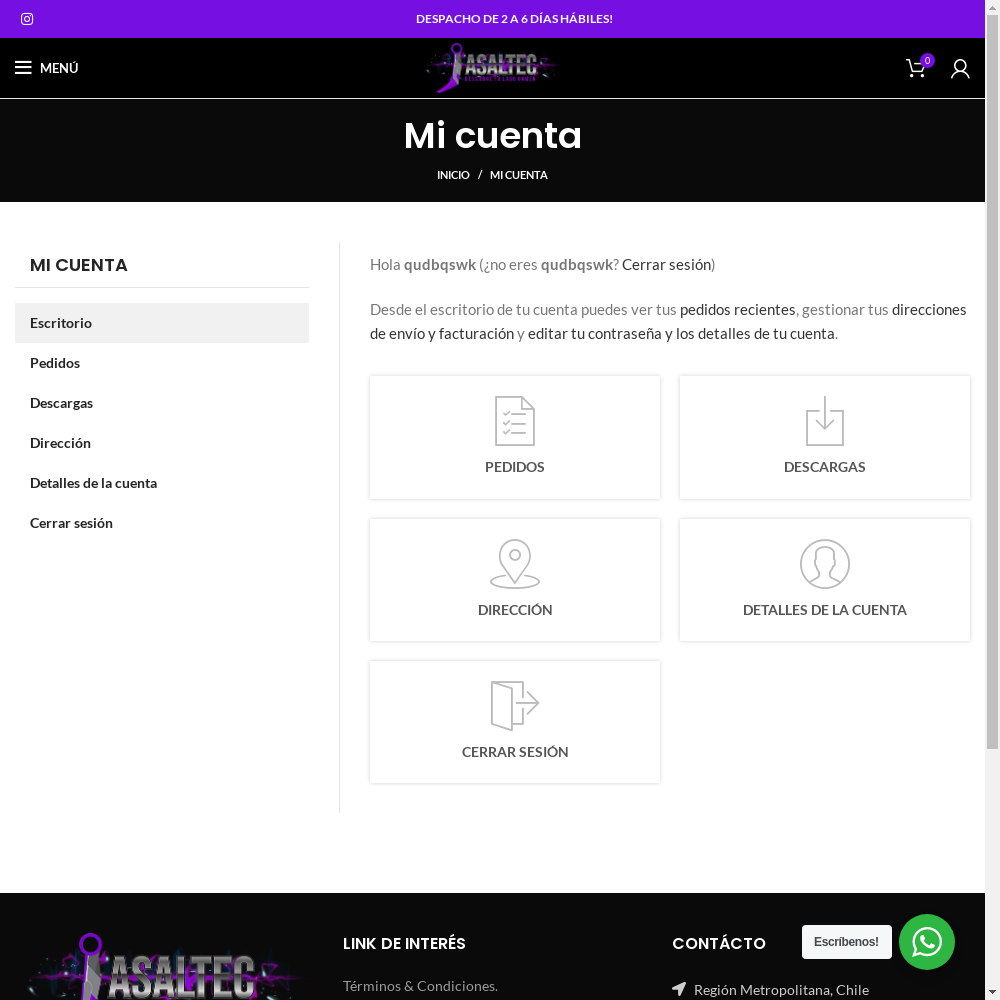

In [ ]:
Image("/content/hito3-CH-inicioSesion/click.png")

### Olvide mi contraseña

In [ ]:
Image("/content/hito3-CH-olvidoPass/paginaRegistro.png")

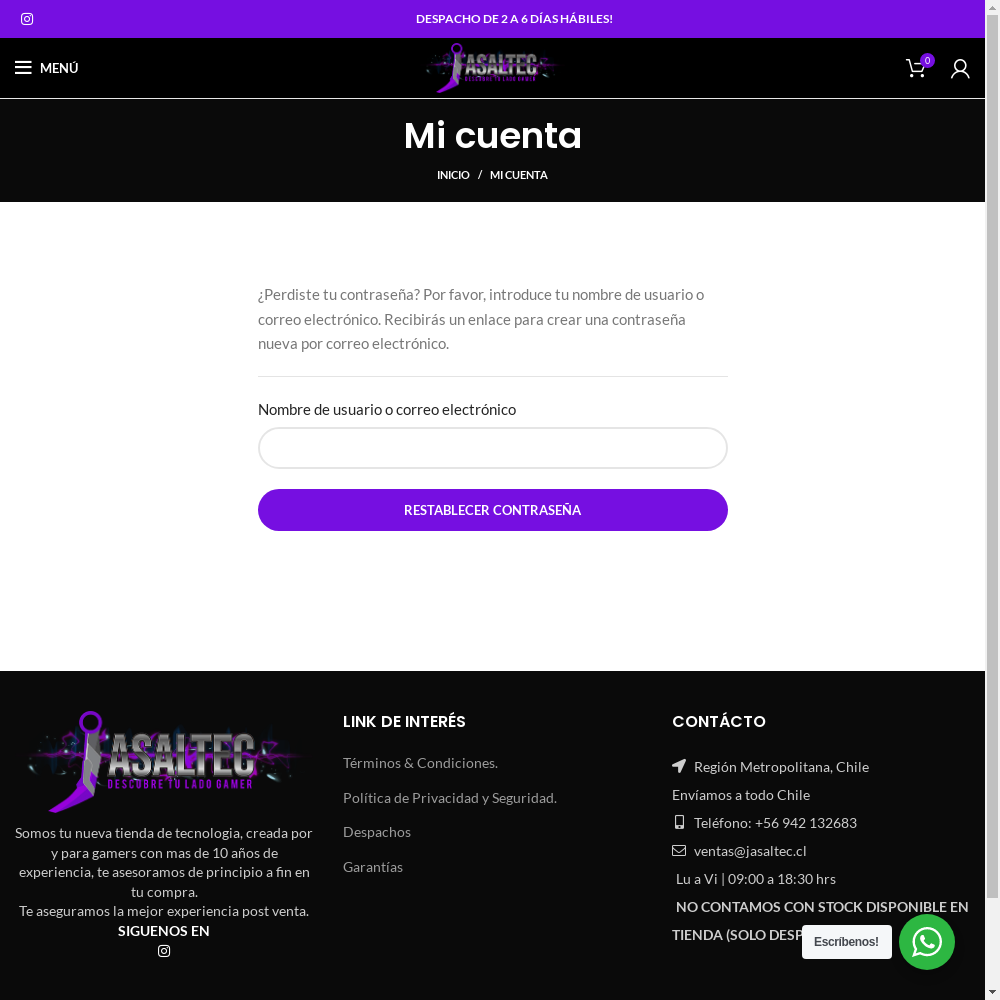

In [ ]:
Image("/content/hito3-CH-olvidoPass/fotopagina.png")

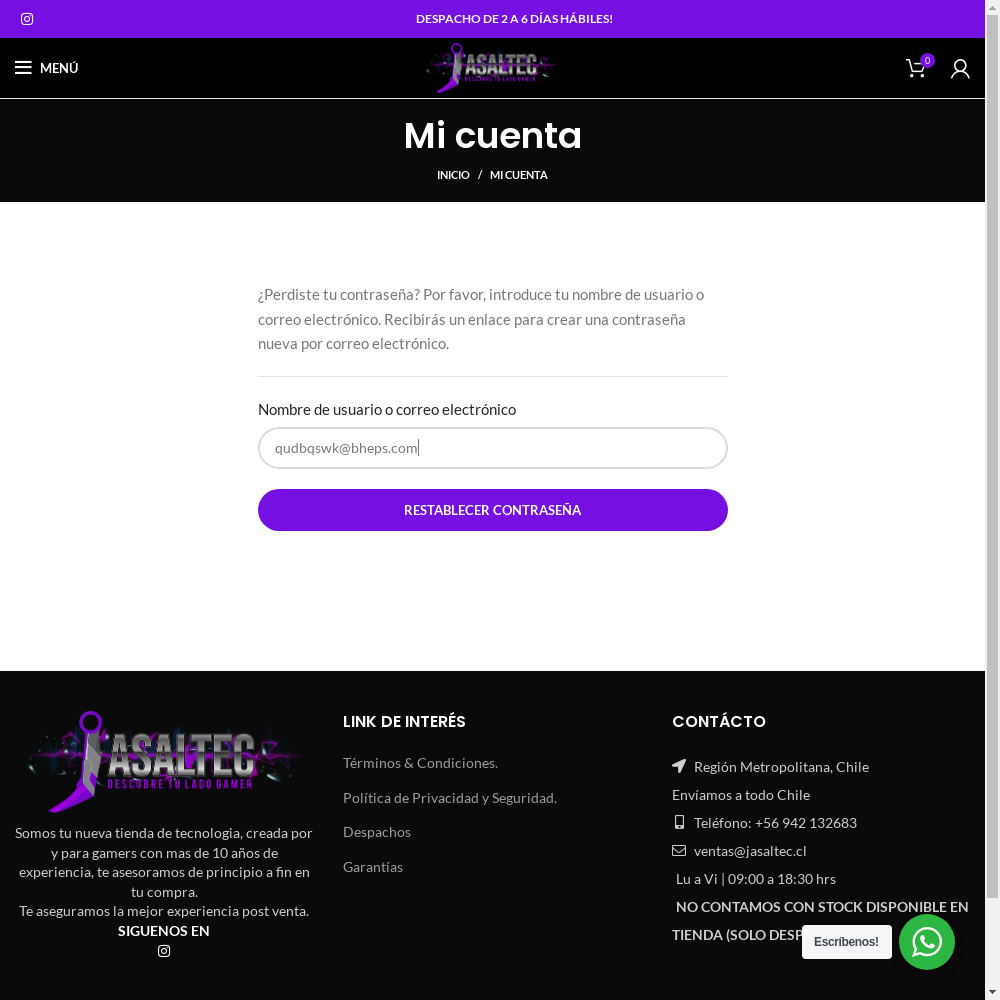

In [ ]:
Image("/content/hito3-CH-olvidoPass/email.png")

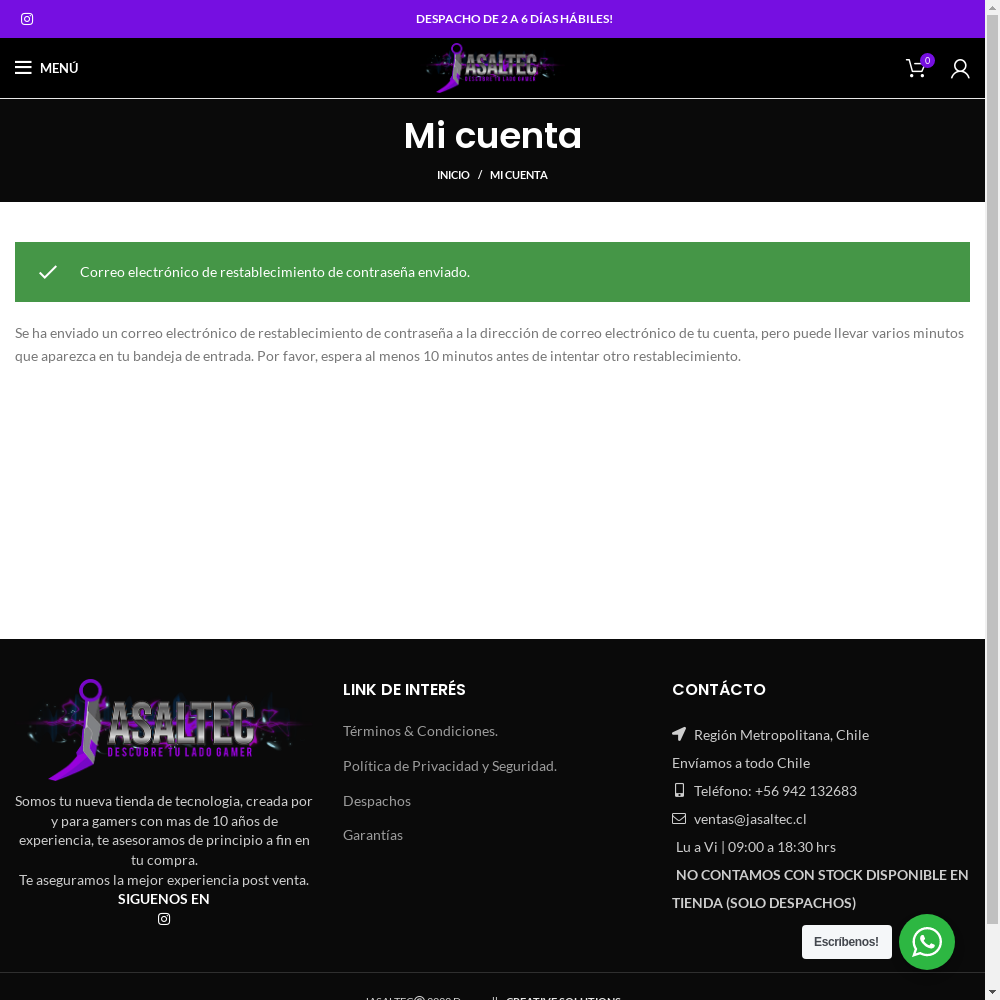

In [ ]:
Image("/content/hito3-CH-olvidoPass/clik.png")

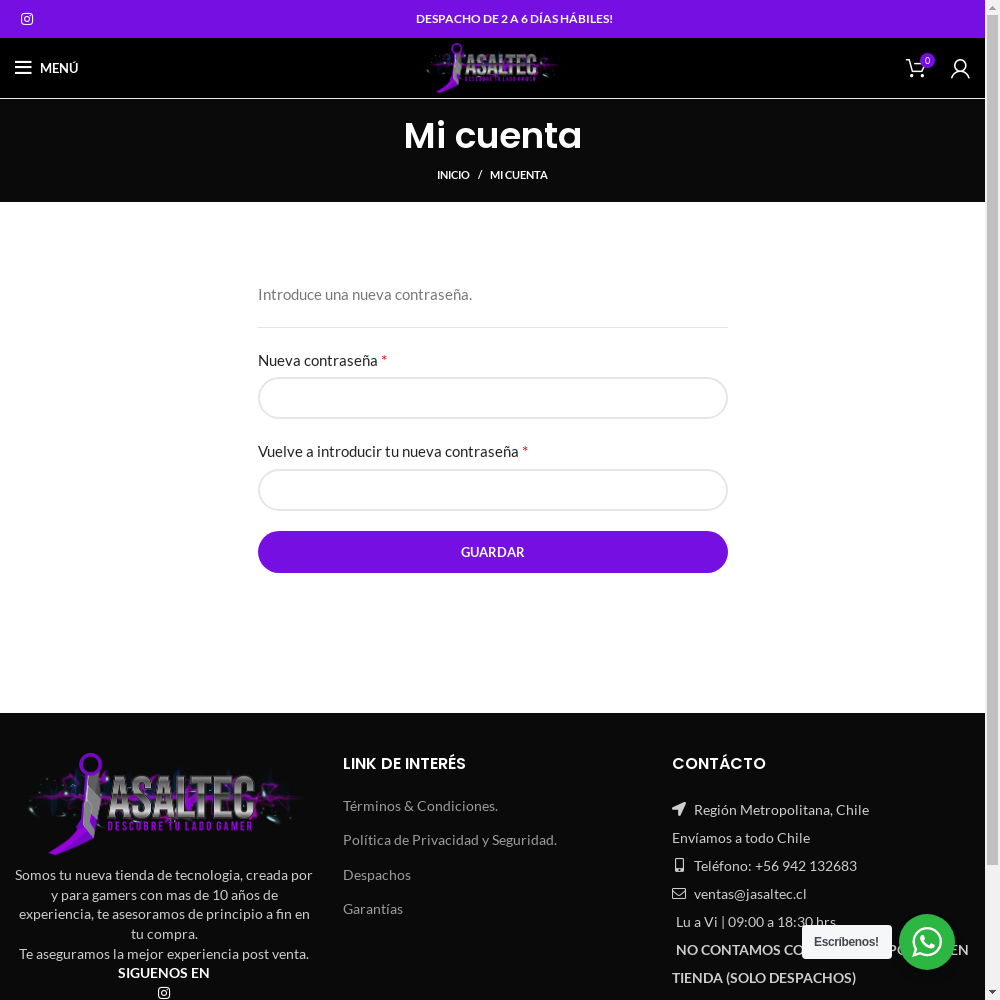

In [ ]:
Image("/content/hito3-CH-olvidoPass/fotopagina2.png")

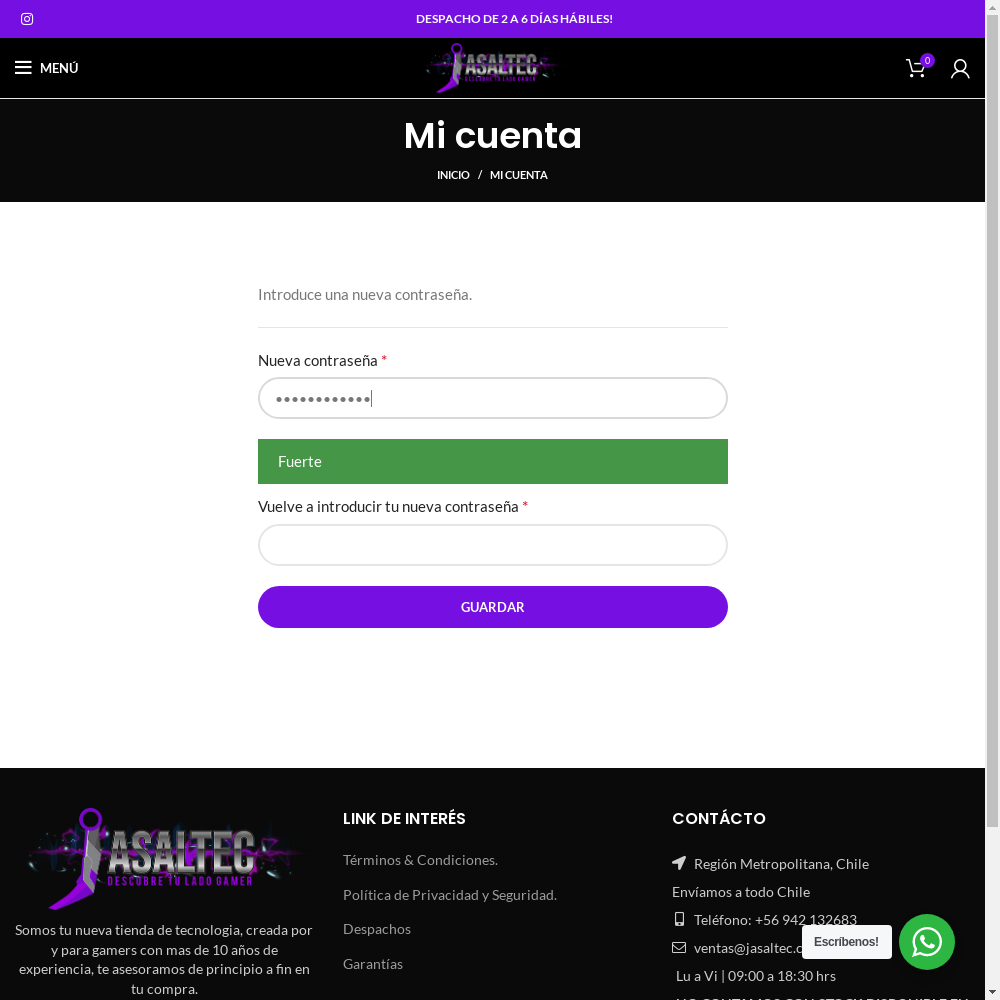

In [ ]:
Image("/content/hito3-CH-olvidoPass/contraseña1.png")

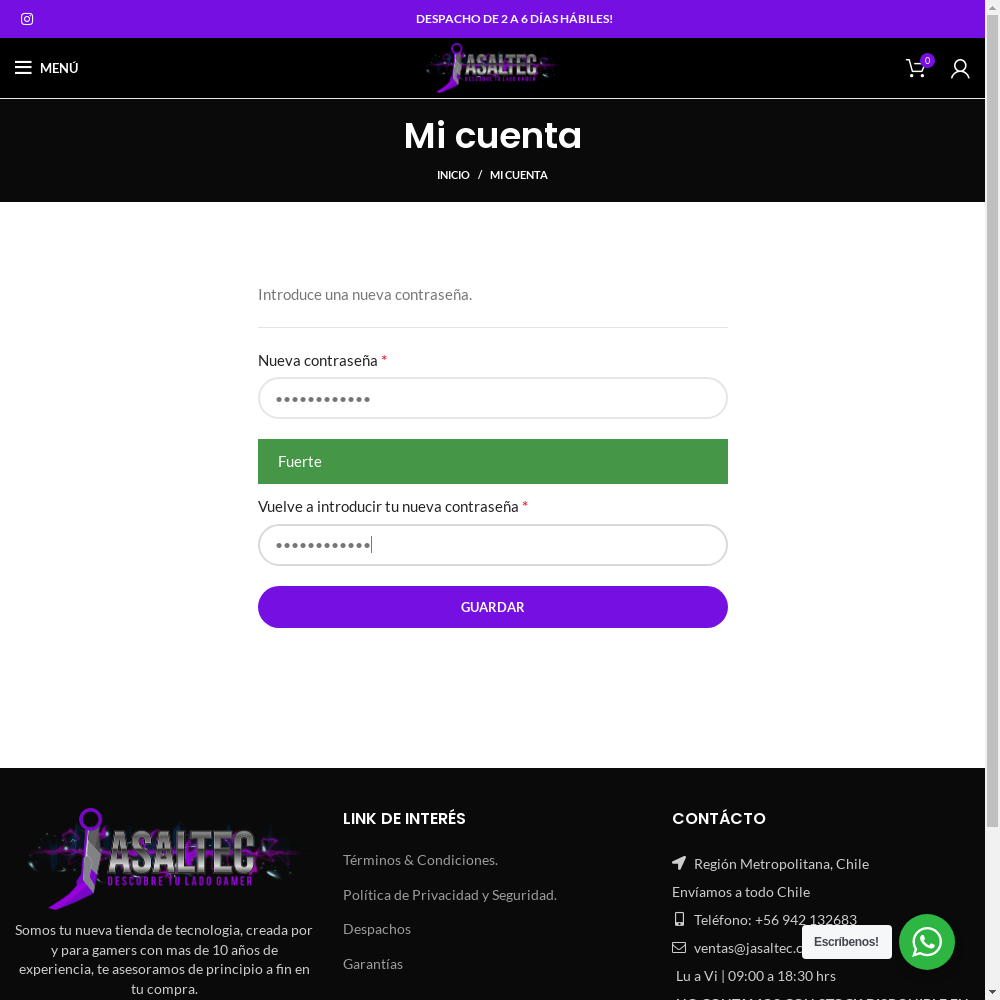

In [ ]:
Image("/content/hito3-CH-olvidoPass/contraseña2.png")

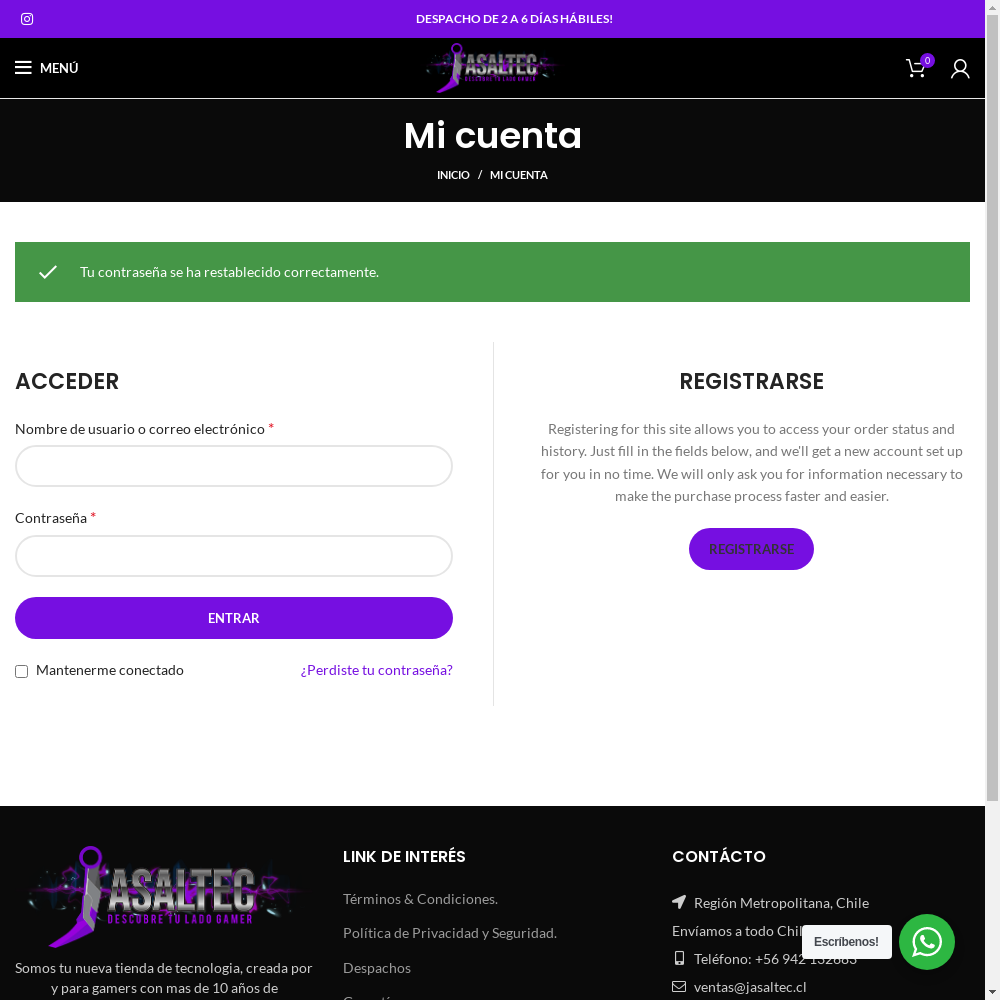

In [ ]:
Image("/content/hito3-CH-olvidoPass/click2.png")